# Topic:    
# <font color = green> The Comparative Analysis of Top 5 Cryptocurrency Returns and Top 5 US Technology Stock Returns for the Period of 2018 to 2024.<a ></a>


### Data source : We got the top 5 cryptocurrency  and  information for  top 5 US technology stocks with the tickers below using the Yahoo Finance Python API.


### Description of Dataset 1 : The dataset of 5 Top cryptocurrency with 6 variables for each cryptocurrency(total of 30 variables)

#### - Bitcoin (BTC-USD) ticker for Bitcoin and US dollar Exchange rate
#### - Ethereum (ETH-USD) ticker for Ethereum and US dollar Exchange rate
#### - Binance coin (BNB-USD) ticker for Binance coin and US dollar Exchange rate
#### - Cardano (ADA-USD) ticker for Cardano and US dollar Exchange rate
#### - Ripple XRP (XRP-USD) ticker for XRP and US dollar Exchange rate

### Description of Dataset 2 : The dataset of 5 Top US Technology stocks with 6 variables for each stock( total of 30 variables)  as listed on the floor of New York Stock Exchange( NYSE).

#### - Apple Inc. (AAPL) ticker
#### - Amazon.com Inc (AMZN) ticker
#### - Alphabet Inc. Google (GOOG) ticker
#### - Microsoft Corp.( MSFT) ticker
#### - Nvidia Corp (NVDA) ticker
#### - S&P500 Market Index (^GSPC) ticker

#### - Open : This is the daily opening  price for each stock or cryptocurrency
#### - Close :This is the daily closing price for each stock or cryptocurrency
#### - High : This is the daily highest price for each stock or cryptocurrency
#### - Low : This is the daily lowest stock for each stock or cryptocurrency
#### - Volume: This is the stock volume traded daily for each stock or cryptocurrency
#### - Adj Close: This is daily stock adjusted closing price after market hours with respect to other stock attributes such as dividends,stock splits and new stock offerings for each stock.


# 

# You need to have internet as we are using Yahoo finance API

## Import Python Libraries

In [1]:
# Import Python Libraries: NumPy,Pandas,Series,DataFrame for data manipulation

import pandas as pd
import numpy as np
from pandas import Series,DataFrame
import scipy.stats as stats

In [2]:
# Import Libraries & modules for data visualization

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import chart_studio.plotly as py
import cufflinks as cf
import plotly.express as px

import plotly.graph_objs as go 

# For Notebooks
init_notebook_mode(connected=True) 

# For offline use
cf.go_offline()

from pandas.plotting import scatter_matrix
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:

# Import Python Libraries: Yahoo Finance API, Datareader and Datetime 
# To be able to get up-to-date historical dataset ,read and handle the data correctly from Yahoo Finance

import pandas_datareader as pdr
import datetime
import yfinance as yf

In [4]:
# For timeseries RNN LSTM neural networks for cryptocurrency and stock prediction or forecast of returns using Adj.Close Price

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler

## API Data Download From Yahoo Finance

In [5]:
# Download the cryptocurrency and stock datasets from Yahoo Finance API

# ^GSPC is the S&P 500 Index used for market index

# Please connect to internet before downloading the dataset from the API

crypto_data = yf.download( ['BTC-USD','ETH-USD','ADA-USD','XRP-USD','BNB-USD'],
                          start='2018-01-01',end='2024-04-23',rounding=True)

techStock_data = yf.download(['MSFT', 'AAPL', 'NVDA', 'AMZN', 'GOOG','^GSPC'],
                         start='2018-01-01',end='2024-04-23',rounding=True)

[*********************100%%**********************]  5 of 5 completed
[*********************100%%**********************]  6 of 6 completed


In [6]:
# Download the dataset as csv file on your desktop
    
#Use .to_csv to save the downloaded dataset in csv

crypto_data.to_csv('ADTA5230FinalProjectCrypto_data.csv')
techStock_data.to_csv('ADTA5230FinalProjectStock_data.csv')


## Load the Dataset and Data Preprocessing

### Clean the above data by removing the irrelevant columns and we only need the date and the Adjusted Close Price for the cryptocurrency and stock datasets.

In [7]:
# Load the two datasets from Yahoo Finance API as a dataframe

crypto_data

Price      Adj Close                                          Close          \
Ticker       ADA-USD BNB-USD   BTC-USD  ETH-USD   XRP-USD   ADA-USD BNB-USD   
Date                                                                          
2018-01-01  0.728657    8.41  13657.20   772.64  2.391030  0.728657    8.41   
2018-01-02  0.782587    8.84  14982.10   884.44  2.480900  0.782587    8.84   
2018-01-03  1.079660    9.54  15201.00   962.72  3.105370  1.079660    9.54   
2018-01-04  1.114120    9.21  15599.20   980.92  3.196630  1.114120    9.21   
2018-01-05  0.999559   14.92  17429.50   997.72  3.048710  0.999559   14.92   
...              ...     ...       ...      ...       ...       ...     ...   
2024-04-18  0.458144  552.17  63512.75  3066.03  0.502983  0.458144  552.17   
2024-04-19  0.468784  554.89  63843.57  3059.28  0.503786  0.468784  554.89   
2024-04-20  0.505908  570.96  64994.44  3157.63  0.529293  0.505908  570.96   
2024-04-21  0.499292  579.62  64926.64  3147.29  0.524680  0.499292  579.62   
2024-04-22  0.516885  605.58  66837.68  3201.65  0.556833  0.516885  605.58   

Price                                    ...      Open                    \
Ticker       BTC-USD  ETH-USD   XRP-USD  ...   ADA-USD BNB-USD   BTC-USD   
Date                                     ...                               
2018-01-01  13657.20   772.64  2.391030  ...  0.718847    8.63  14112.20   
2018-01-02  14982.10   884.44  2.480900  ...  0.724676    8.46  13625.00   
2018-01-03  15201.00   962.72  3.105370  ...  0.779681    8.77  14978.20   
2018-01-04  15599.20   980.92  3.196630  ...  1.094030    9.45  15270.70   
2018-01-05  17429.50   997.72  3.048710  ...  1.171150    9.15  15477.20   
...              ...      ...       ...  ...       ...     ...       ...   
2024-04-18  63512.75  3066.03  0.502983  ...  0.444299  534.41  61275.32   
2024-04-19  63843.57  3059.28  0.503786  ...  0.458143  552.17  63510.75   
2024-04-20  64994.44  3157.63  0.529293  ...  0.468784  554.89  63851.10   
2024-04-21  64926.64  3147.29  0.524680  ...  0.505908  570.96  64992.82   
2024-04-22  66837.68  3201.65  0.556833  ...  0.499290  579.61  64935.63   

Price                             Volume                           \
Ticker      ETH-USD   XRP-USD    ADA-USD     BNB-USD      BTC-USD   
Date                                                                
2018-01-01   755.76  2.296020  150186000    66422800  10291200000   
2018-01-02   772.35  2.369480  289712000   104789000  16846600192   
2018-01-03   886.00  2.464100  657398016   108852000  16871900160   
2018-01-04   961.71  3.117340  593430016   158819008  21783199744   
2018-01-05   975.75  3.300810  508100000   341504992  23840899072   
...             ...       ...        ...         ...          ...   
2024-04-18  2984.71  0.494840  409488158  1439312699  36006307335   
2024-04-19  3065.95  0.502983  598092967  1320094794  49920425401   
2024-04-20  3059.48  0.503786  536707766   697007137  23097485495   
2024-04-21  3157.57  0.529292  354417377   782061076  20506644853   
2024-04-22  3147.66  0.524676  402921410  1300340623  28282686673   

Price                                
Ticker          ETH-USD     XRP-USD  
Date                                 
2018-01-01   2595760128  1894230016  
2018-01-02   5783349760  3171010048  
2018-01-03   5093159936  6635879936  
2018-01-04   6502859776  8103660032  
2018-01-05   6683149824  6288500224  
...                 ...         ...  
2024-04-18  15183777035  1420648263  
2024-04-19  20399982867  2145715371  
2024-04-20   9918642130  1237297114  
2024-04-21   9394387894   896875433  
2024-04-22  12063858733  1671344072  

[2304 rows x 30 columns]

In [8]:
# We group the columns with column header names to be able to do multi-level indexing based on the header names

crypto_data.columns.names = ['TickerName','cryptoDetails']
crypto_data.head(5)

TickerName    Adj Close                                       Close          \
cryptoDetails   ADA-USD BNB-USD  BTC-USD ETH-USD  XRP-USD   ADA-USD BNB-USD   
Date                                                                          
2018-01-01     0.728657    8.41  13657.2  772.64  2.39103  0.728657    8.41   
2018-01-02     0.782587    8.84  14982.1  884.44  2.48090  0.782587    8.84   
2018-01-03     1.079660    9.54  15201.0  962.72  3.10537  1.079660    9.54   
2018-01-04     1.114120    9.21  15599.2  980.92  3.19663  1.114120    9.21   
2018-01-05     0.999559   14.92  17429.5  997.72  3.04871  0.999559   14.92   

TickerName                               ...      Open                   \
cryptoDetails  BTC-USD ETH-USD  XRP-USD  ...   ADA-USD BNB-USD  BTC-USD   
Date                                     ...                              
2018-01-01     13657.2  772.64  2.39103  ...  0.718847    8.63  14112.2   
2018-01-02     14982.1  884.44  2.48090  ...  0.724676    8.46  13625.0   
2018-01-03     15201.0  962.72  3.10537  ...  0.779681    8.77  14978.2   
2018-01-04     15599.2  980.92  3.19663  ...  1.094030    9.45  15270.7   
2018-01-05     17429.5  997.72  3.04871  ...  1.171150    9.15  15477.2   

TickerName                         Volume                                      \
cryptoDetails ETH-USD  XRP-USD    ADA-USD    BNB-USD      BTC-USD     ETH-USD   
Date                                                                            
2018-01-01     755.76  2.29602  150186000   66422800  10291200000  2595760128   
2018-01-02     772.35  2.36948  289712000  104789000  16846600192  5783349760   
2018-01-03     886.00  2.46410  657398016  108852000  16871900160  5093159936   
2018-01-04     961.71  3.11734  593430016  158819008  21783199744  6502859776   
2018-01-05     975.75  3.30081  508100000  341504992  23840899072  6683149824   

TickerName                 
cryptoDetails     XRP-USD  
Date                       
2018-01-01     1894230016  
2018-01-02     3171010048  
2018-01-03     6635879936  
2018-01-04     8103660032  
2018-01-05     6288500224  

[5 rows x 30 columns]

In [9]:
# Check the first five rows

crypto_data.tail(5)

TickerName    Adj Close                                          Close  \
cryptoDetails   ADA-USD BNB-USD   BTC-USD  ETH-USD   XRP-USD   ADA-USD   
Date                                                                     
2024-04-18     0.458144  552.17  63512.75  3066.03  0.502983  0.458144   
2024-04-19     0.468784  554.89  63843.57  3059.28  0.503786  0.468784   
2024-04-20     0.505908  570.96  64994.44  3157.63  0.529293  0.505908   
2024-04-21     0.499292  579.62  64926.64  3147.29  0.524680  0.499292   
2024-04-22     0.516885  605.58  66837.68  3201.65  0.556833  0.516885   

TickerName                                          ...      Open          \
cryptoDetails BNB-USD   BTC-USD  ETH-USD   XRP-USD  ...   ADA-USD BNB-USD   
Date                                                ...                     
2024-04-18     552.17  63512.75  3066.03  0.502983  ...  0.444299  534.41   
2024-04-19     554.89  63843.57  3059.28  0.503786  ...  0.458143  552.17   
2024-04-20     570.96  64994.44  3157.63  0.529293  ...  0.468784  554.89   
2024-04-21     579.62  64926.64  3147.29  0.524680  ...  0.505908  570.96   
2024-04-22     605.58  66837.68  3201.65  0.556833  ...  0.499290  579.61   

TickerName                                     Volume              \
cryptoDetails   BTC-USD  ETH-USD   XRP-USD    ADA-USD     BNB-USD   
Date                                                                
2024-04-18     61275.32  2984.71  0.494840  409488158  1439312699   
2024-04-19     63510.75  3065.95  0.502983  598092967  1320094794   
2024-04-20     63851.10  3059.48  0.503786  536707766   697007137   
2024-04-21     64992.82  3157.57  0.529292  354417377   782061076   
2024-04-22     64935.63  3147.66  0.524676  402921410  1300340623   

TickerName                                           
cryptoDetails      BTC-USD      ETH-USD     XRP-USD  
Date                                                 
2024-04-18     36006307335  15183777035  1420648263  
2024-04-19     49920425401  20399982867  2145715371  
2024-04-20     23097485495   9918642130  1237297114  
2024-04-21     20506644853   9394387894   896875433  
2024-04-22     28282686673  12063858733  1671344072  

[5 rows x 30 columns]

In [10]:
# The US technology stock dataset and S&P500 index (^GSPC)

techStock_data

Price      Adj Close                                            Close          \
Ticker          AAPL    AMZN    GOOG    MSFT    NVDA    ^GSPC    AAPL    AMZN   
Date                                                                            
2018-01-02     40.67   59.45   53.25   80.08   49.31  2695.81   43.06   59.45   
2018-01-03     40.66   60.21   54.12   80.45   52.56  2713.06   43.06   60.21   
2018-01-04     40.85   60.48   54.32   81.16   52.83  2723.99   43.26   60.48   
2018-01-05     41.32   61.46   55.11   82.17   53.28  2743.15   43.75   61.46   
2018-01-08     41.16   62.34   55.35   82.25   54.91  2747.71   43.59   62.34   
...              ...     ...     ...     ...     ...      ...     ...     ...   
2024-04-16    169.38  183.32  156.00  414.58  874.15  5051.41  169.38  183.32   
2024-04-17    168.00  181.28  156.88  411.84  840.35  5022.21  168.00  181.28   
2024-04-18    167.04  179.22  157.46  404.27  846.71  5011.12  167.04  179.22   
2024-04-19    165.00  174.63  155.72  399.12  762.00  4967.23  165.00  174.63   
2024-04-22    165.84  177.23  157.95  400.96  795.18  5010.60  165.84  177.23   

Price                       ...    Open                              Volume  \
Ticker        GOOG    MSFT  ...    GOOG    MSFT    NVDA    ^GSPC       AAPL   
Date                        ...                                               
2018-01-02   53.25   85.95  ...   52.42   86.13   48.94  2683.73  102223600   
2018-01-03   54.12   86.35  ...   53.22   86.06   51.03  2697.85  118071600   
2018-01-04   54.32   87.11  ...   54.40   86.59   53.94  2719.31   89738400   
2018-01-05   55.11   88.19  ...   54.70   87.66   53.55  2731.33   94640000   
2018-01-08   55.35   88.28  ...   55.11   88.20   55.10  2742.67   82271200   
...            ...     ...  ...     ...     ...     ...      ...        ...   
2024-04-16  156.00  414.58  ...  155.64  414.57  864.33  5064.59   73711200   
2024-04-17  156.88  411.84  ...  157.19  417.25  883.40  5068.97   50901200   
2024-04-18  157.46  404.27  ...  156.93  410.63  849.70  5031.52   43122900   
2024-04-19  155.72  399.12  ...  157.75  404.03  831.50  5005.44   67772100   
2024-04-22  157.95  400.96  ...  156.01  400.08  781.04  4987.33   48116400   

Price                                                           
Ticker          AMZN      GOOG      MSFT      NVDA       ^GSPC  
Date                                                            
2018-01-02  53890000  24752000  22483800  35561600  3397430000  
2018-01-03  62176000  28604000  26061400  91470400  3544030000  
2018-01-04  60442000  20092000  21912000  58326800  3697340000  
2018-01-05  70894000  25582000  23407100  58012400  3239280000  
2018-01-08  85590000  20952000  22113000  88121600  3246160000  
...              ...       ...       ...       ...         ...  
2024-04-16  32891300  15413200  16765600  37045300  4006200000  
2024-04-17  31359700  16237800  15855500  49540000  3596130000  
2024-04-18  30723800  14016100  21029900  44726000  3619760000  
2024-04-19  55950000  20063900  30276500  87190500  3878750000  
2024-04-22  37924900  17243900  20286900  59634100  3820250000  

[1586 rows x 36 columns]

In [11]:
# We group the column with column header names to be able to do multi-level indexing based on the header names

# We get the first five rows

techStock_data.columns.names = ['Tickername','stockDetails']
techStock_data.head(5)

Tickername   Adj Close                                       Close         \
stockDetails      AAPL   AMZN   GOOG   MSFT   NVDA    ^GSPC   AAPL   AMZN   
Date                                                                        
2018-01-02       40.67  59.45  53.25  80.08  49.31  2695.81  43.06  59.45   
2018-01-03       40.66  60.21  54.12  80.45  52.56  2713.06  43.06  60.21   
2018-01-04       40.85  60.48  54.32  81.16  52.83  2723.99  43.26  60.48   
2018-01-05       41.32  61.46  55.11  82.17  53.28  2743.15  43.75  61.46   
2018-01-08       41.16  62.34  55.35  82.25  54.91  2747.71  43.59  62.34   

Tickername                  ...   Open                            Volume  \
stockDetails   GOOG   MSFT  ...   GOOG   MSFT   NVDA    ^GSPC       AAPL   
Date                        ...                                            
2018-01-02    53.25  85.95  ...  52.42  86.13  48.94  2683.73  102223600   
2018-01-03    54.12  86.35  ...  53.22  86.06  51.03  2697.85  118071600   
2018-01-04    54.32  87.11  ...  54.40  86.59  53.94  2719.31   89738400   
2018-01-05    55.11  88.19  ...  54.70  87.66  53.55  2731.33   94640000   
2018-01-08    55.35  88.28  ...  55.11  88.20  55.10  2742.67   82271200   

Tickername                                                        
stockDetails      AMZN      GOOG      MSFT      NVDA       ^GSPC  
Date                                                              
2018-01-02    53890000  24752000  22483800  35561600  3397430000  
2018-01-03    62176000  28604000  26061400  91470400  3544030000  
2018-01-04    60442000  20092000  21912000  58326800  3697340000  
2018-01-05    70894000  25582000  23407100  58012400  3239280000  
2018-01-08    85590000  20952000  22113000  88121600  3246160000  

[5 rows x 36 columns]

## Perform the Exploratory Data Analysis(EDA)

In [12]:
# Check the length of the cryptocurrency dataset

crypto_data.shape

(2304, 30)

In [13]:
# Check the length of the technology stock dataset

techStock_data.shape

(1586, 36)

In [14]:
# We will use the Adjusted Close price  of cryptocurrency to get our returns

df_crypto = crypto_data['Adj Close']
df_crypto

cryptoDetails,ADA-USD,BNB-USD,BTC-USD,ETH-USD,XRP-USD
Date,,,,,
2018-01-01,0.728657,8.41,13657.20,772.64,2.391030
2018-01-02,0.782587,8.84,14982.10,884.44,2.480900
2018-01-03,1.079660,9.54,15201.00,962.72,3.105370
2018-01-04,1.114120,9.21,15599.20,980.92,3.196630
2018-01-05,0.999559,14.92,17429.50,997.72,3.048710
...,...,...,...,...,...
2024-04-18,0.458144,552.17,63512.75,3066.03,0.502983
2024-04-19,0.468784,554.89,63843.57,3059.28,0.503786
2024-04-20,0.505908,570.96,64994.44,3157.63,0.529293


In [15]:
# Check the columns of the cryptocurrency dataset

df_crypto.columns

Index(['ADA-USD', 'BNB-USD', 'BTC-USD', 'ETH-USD', 'XRP-USD'], dtype='object', name='cryptoDetails')

In [16]:
# We will use only the Adjusted Close price  of technology stocks to get our returns

df_stock = techStock_data['Adj Close']
df_stock

stockDetails,AAPL,AMZN,GOOG,MSFT,NVDA,^GSPC
Date,,,,,,
2018-01-02,40.67,59.45,53.25,80.08,49.31,2695.81
2018-01-03,40.66,60.21,54.12,80.45,52.56,2713.06
2018-01-04,40.85,60.48,54.32,81.16,52.83,2723.99
2018-01-05,41.32,61.46,55.11,82.17,53.28,2743.15
2018-01-08,41.16,62.34,55.35,82.25,54.91,2747.71
...,...,...,...,...,...,...
2024-04-16,169.38,183.32,156.00,414.58,874.15,5051.41
2024-04-17,168.00,181.28,156.88,411.84,840.35,5022.21
2024-04-18,167.04,179.22,157.46,404.27,846.71,5011.12


In [17]:
#The descriptive statistics of the Adjusted Close Price of cryptocurrency

df_crypto.describe()

cryptoDetails,ADA-USD,BNB-USD,BTC-USD,ETH-USD,XRP-USD
count,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000
mean,0.478731,183.037266,23443.711406,1340.220911,0.523778
std,0.565784,180.870197,17467.944225,1166.029120,0.321465
min,0.023961,4.530000,3236.760000,84.310000,0.139635
25%,0.082155,16.400000,8597.940000,234.370000,0.310446
50%,0.292069,207.440000,19155.840000,1216.250000,0.453622
75%,0.574370,310.777500,36588.445000,1971.355000,0.624419
max,2.968239,675.680000,73083.500000,4812.090000,3.377810


In [18]:
#The descriptive statistics of the Adjusted Close Price of US technology stocks and S&P 500 (^GSPC)

df_stock.describe()

stockDetails,AAPL,AMZN,GOOG,MSFT,NVDA,^GSPC
count,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000
mean,112.126040,122.503001,94.228644,218.301740,186.255057,3657.448462
std,52.360532,34.412758,33.316519,92.516887,177.770291,742.350355
min,34.080000,59.450000,48.810000,79.210000,31.520000,2237.400000
25%,52.652500,91.122500,60.272500,130.652500,60.137500,2904.477500
50%,124.890000,118.390000,91.135000,225.820000,133.730000,3772.205000
75%,157.545000,156.902500,126.067500,287.300000,229.347500,4298.520000
max,197.860000,189.050000,160.790000,429.370000,950.020000,5254.350000


In [19]:
# Check the columns of the US technology stocks
df_stock.columns

Index(['AAPL', 'AMZN', 'GOOG', 'MSFT', 'NVDA', '^GSPC'], dtype='object', name='stockDetails')

In [20]:
# Check null values for the crypto dataset

df_crypto.isnull().sum()

cryptoDetails
ADA-USD    0
BNB-USD    0
BTC-USD    0
ETH-USD    0
XRP-USD    0
dtype: int64

In [21]:
# Check null values for the stock dataset
df_stock.isnull().sum()

stockDetails
AAPL     0
AMZN     0
GOOG     0
MSFT     0
NVDA     0
^GSPC    0
dtype: int64

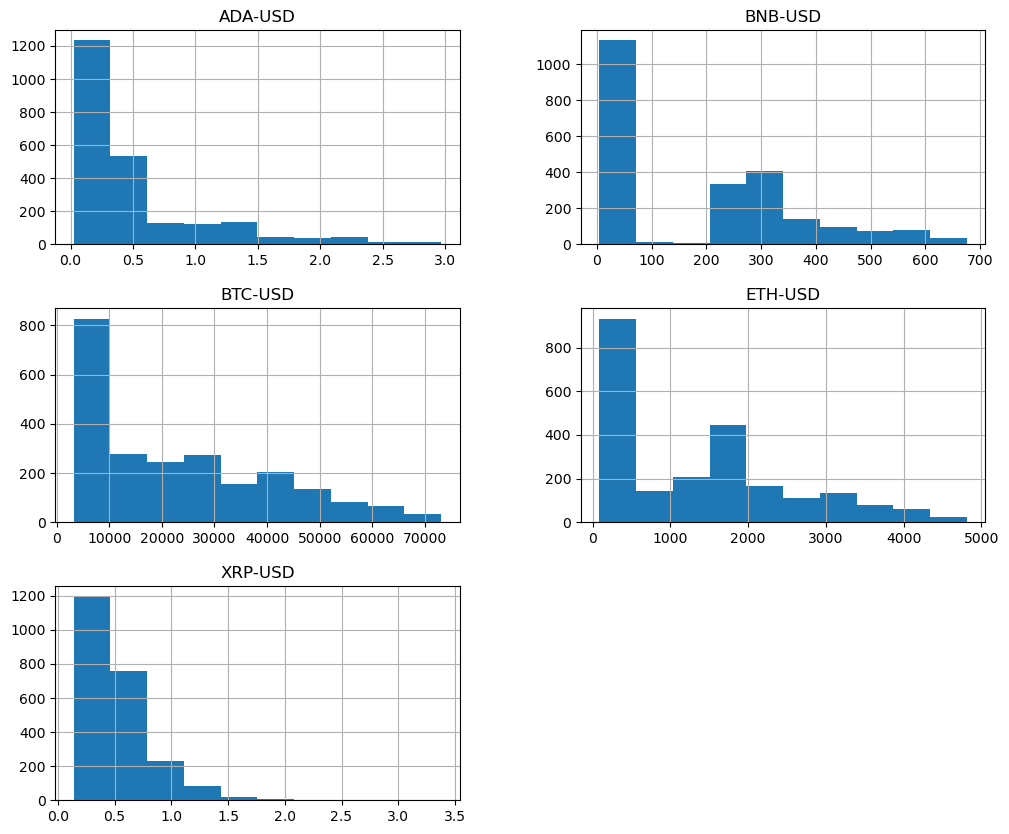

In [22]:
# Plot histogram of the cryptocurrency dataset to check the distribution

df_crypto.hist(figsize=(12, 10))
pyplot.show()

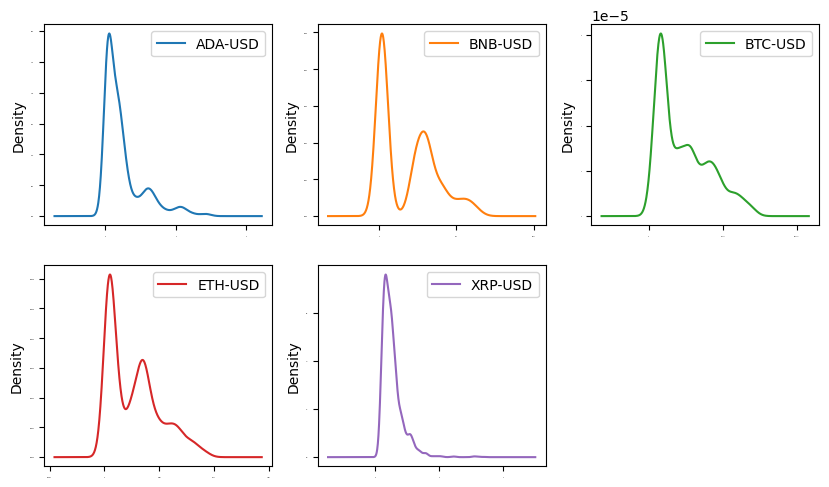

In [23]:
# Plot the density curve of the cryptocurrency dataset to check the skewness and distribution

df_crypto.plot(kind='density', subplots=True, sharex=False, legend=True, fontsize=1,layout=(4, 3),
figsize=(10, 12))
pyplot.show()

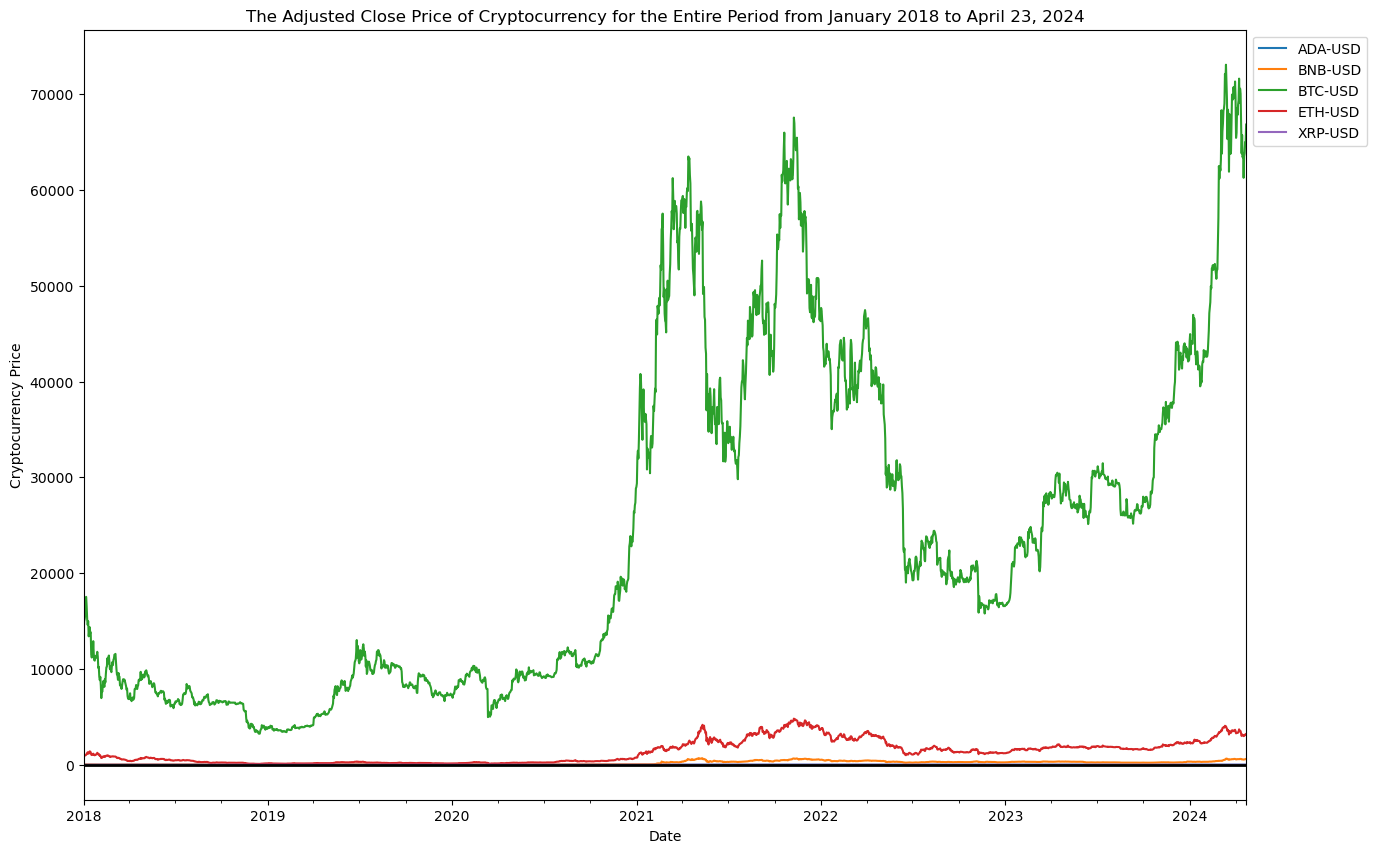

In [24]:
# To plot the adjusted close price of cryptocurrency for the entire period to check the price trend and movement

df_crypto.plot(figsize=(15, 10)).axhline(color='black', linewidth=2)
plt.ylabel('Cryptocurrency Price')
plt.title("The Adjusted Close Price of Cryptocurrency for the Entire Period from January 2018 to April 23, 2024")
plt.legend(bbox_to_anchor=(1,1))

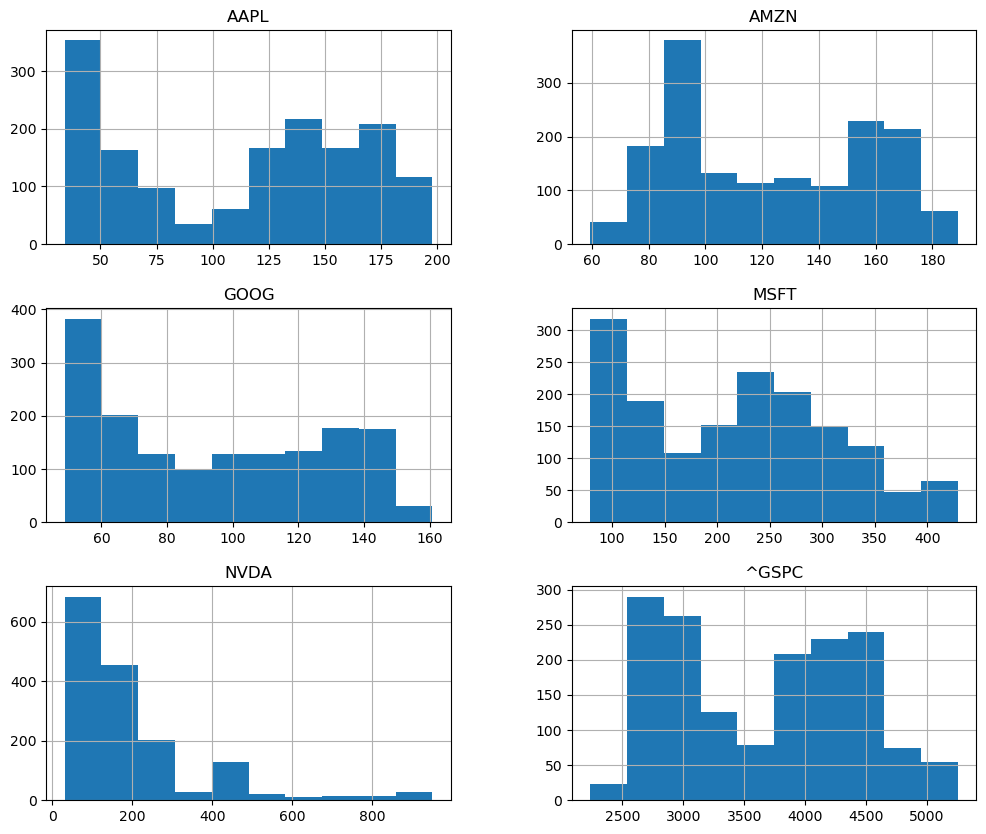

In [25]:
# Plot histogram of the US technology stock dataset to check the distribution

df_stock.hist(figsize=(12, 10))
pyplot.show()

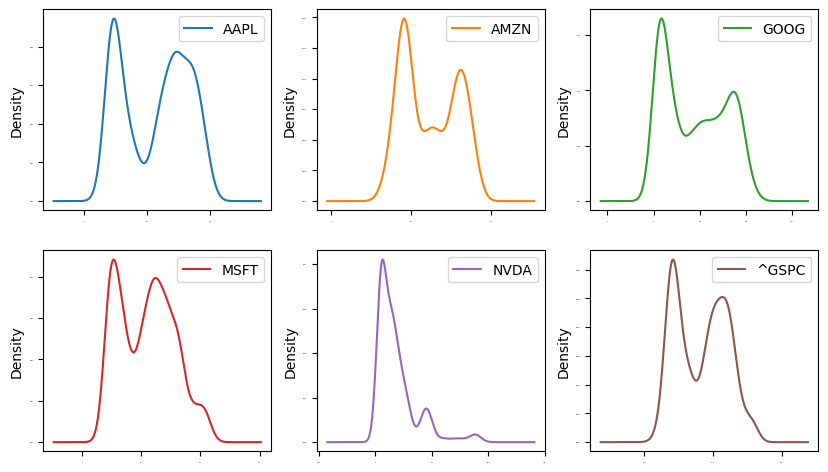

In [26]:
# Plot the density curve of the technology stock dataset to check the skewness and distribution

df_stock.plot(kind='density', subplots=True, sharex=False, legend=True, fontsize=1,layout=(4, 3),
figsize=(10, 12))
pyplot.show()

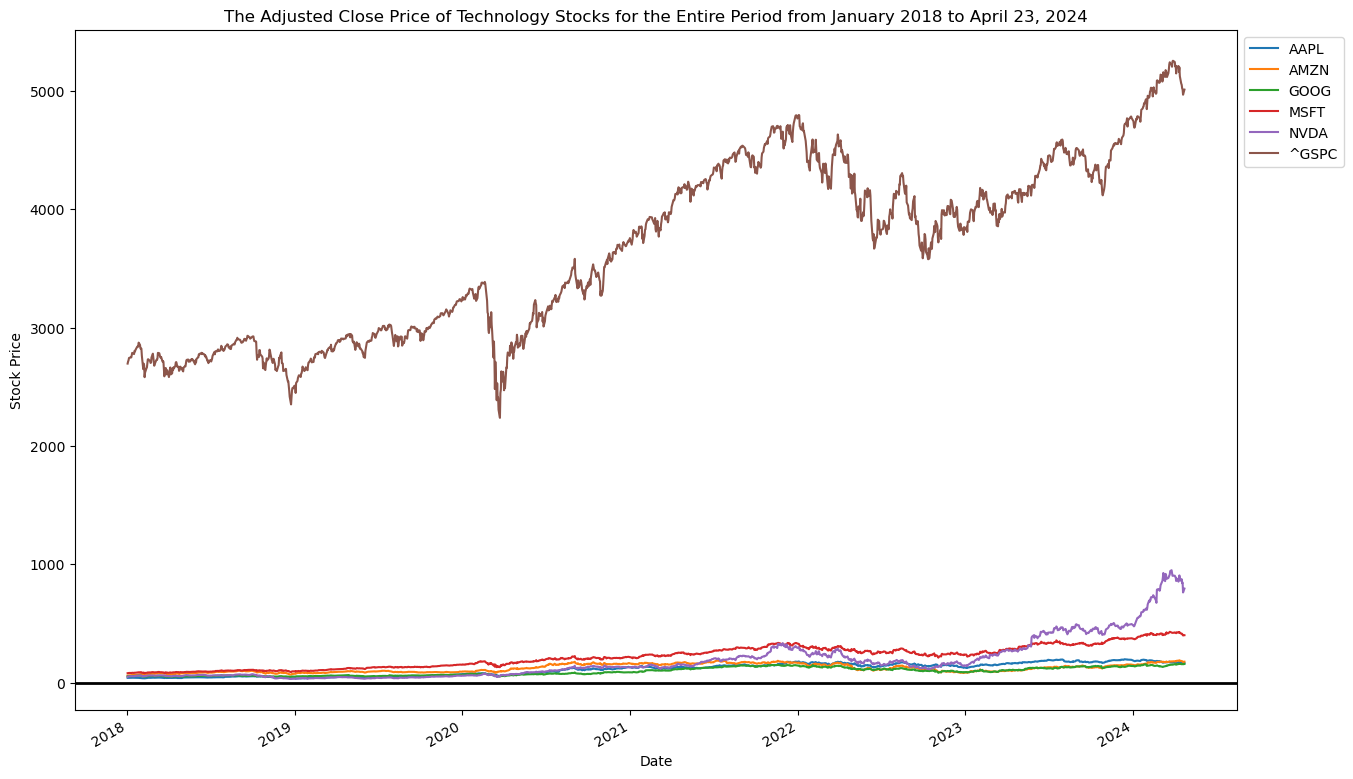

In [27]:
# To show the price pattern movement of the stocks for the entire period 

df_stock.plot(figsize=(15, 10)).axhline(color='black', linewidth=2)
plt.ylabel('Stock Price')
plt.title("The Adjusted Close Price of Technology Stocks for the Entire Period from January 2018 to April 23, 2024")
plt.legend(bbox_to_anchor=(1,1))

## Calculate the Returns for Cryptocurrency and Technology Stocks

In [28]:
# Calculate the cryptocurrency returns

cryptoReturns= df_crypto.pct_change()
cryptoReturns

cryptoDetails,ADA-USD,BNB-USD,BTC-USD,ETH-USD,XRP-USD
Date,,,,,
2018-01-01,NaN,NaN,NaN,NaN,NaN
2018-01-02,0.074013,0.051130,0.097011,0.144699,0.037586
2018-01-03,0.379604,0.079186,0.014611,0.088508,0.251711
2018-01-04,0.031917,-0.034591,0.026196,0.018905,0.029388
2018-01-05,-0.102826,0.619978,0.117333,0.017127,-0.046274
...,...,...,...,...,...
2024-04-18,0.031171,0.033214,0.036491,0.027239,0.016454
2024-04-19,0.023224,0.004926,0.005209,-0.002202,0.001596
2024-04-20,0.079192,0.028961,0.018026,0.032148,0.050631


In [29]:
# Calculate the stock returns

stockReturns= df_stock.pct_change()
stockReturns

stockDetails,AAPL,AMZN,GOOG,MSFT,NVDA,^GSPC
Date,,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,-0.000246,0.012784,0.016338,0.004620,0.065910,0.006399
2018-01-04,0.004673,0.004484,0.003695,0.008825,0.005137,0.004029
2018-01-05,0.011506,0.016204,0.014543,0.012445,0.008518,0.007034
2018-01-08,-0.003872,0.014318,0.004355,0.000974,0.030593,0.001662
...,...,...,...,...,...,...
2024-04-16,-0.019167,-0.001634,-0.002111,0.002273,0.016442,-0.002057
2024-04-17,-0.008147,-0.011128,0.005641,-0.006609,-0.038666,-0.005781
2024-04-18,-0.005714,-0.011364,0.003697,-0.018381,0.007568,-0.002208


## Calculate the Cummulative Returns for Cryptocurrency and Technology Stocks for The Entire Period

In [30]:
# Cumulative returns of cryptocurrency for the entire period

cumCryptoReturns = (cryptoReturns + 1).cumprod()-1 
cumCryptoReturns

cryptoDetails,ADA-USD,BNB-USD,BTC-USD,ETH-USD,XRP-USD
Date,,,,,
2018-01-01,NaN,NaN,NaN,NaN,NaN
2018-01-02,0.074013,0.051130,0.097011,0.144699,0.037586
2018-01-03,0.481712,0.134364,0.113039,0.246014,0.298758
2018-01-04,0.529005,0.095125,0.142196,0.269569,0.336926
2018-01-05,0.371783,0.774078,0.276213,0.291313,0.275061
...,...,...,...,...,...
2024-04-18,-0.371249,64.656361,3.650496,2.968252,-0.789638
2024-04-19,-0.356647,64.979786,3.674719,2.959515,-0.789302
2024-04-20,-0.305698,66.890606,3.758987,3.086806,-0.778634


In [31]:
# Drop the first row due to no previous value in calculating the returns

cumCryptoReturns.dropna(inplace=True)
cumCryptoReturns

cryptoDetails,ADA-USD,BNB-USD,BTC-USD,ETH-USD,XRP-USD
Date,,,,,
2018-01-02,0.074013,0.051130,0.097011,0.144699,0.037586
2018-01-03,0.481712,0.134364,0.113039,0.246014,0.298758
2018-01-04,0.529005,0.095125,0.142196,0.269569,0.336926
2018-01-05,0.371783,0.774078,0.276213,0.291313,0.275061
2018-01-06,0.409648,1.706302,0.283352,0.348209,0.293990
...,...,...,...,...,...
2024-04-18,-0.371249,64.656361,3.650496,2.968252,-0.789638
2024-04-19,-0.356647,64.979786,3.674719,2.959515,-0.789302
2024-04-20,-0.305698,66.890606,3.758987,3.086806,-0.778634


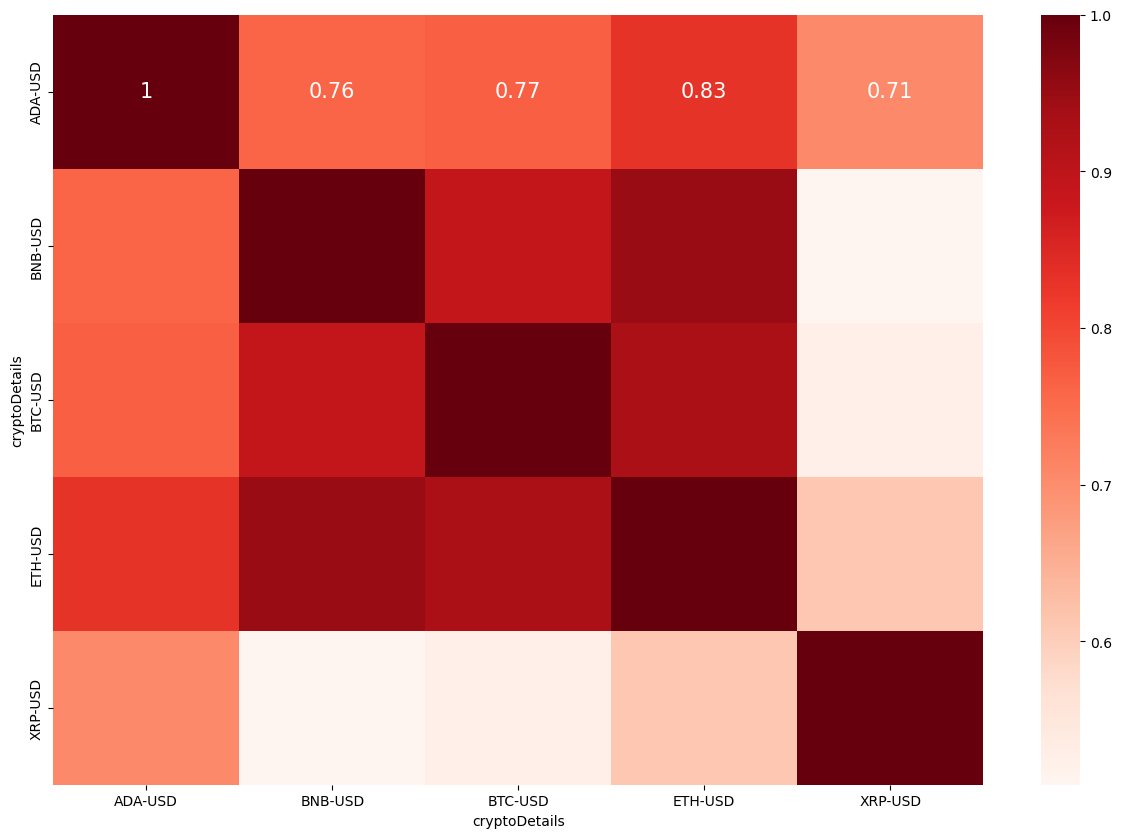

In [32]:
# Heatmap for the cryptocurrency returns to check the correlation

plt.figure(figsize=(15,10))
sns.heatmap(cumCryptoReturns.corr(),annot=True,cmap="Reds",annot_kws={"fontsize":15})
plt.show()

In [33]:
# Cumulative returns of technology stocks for the entire period

stockReturns_cum = (stockReturns + 1).cumprod()-1
stockReturns_cum


stockDetails,AAPL,AMZN,GOOG,MSFT,NVDA,^GSPC
Date,,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,-0.000246,0.012784,0.016338,0.004620,0.065910,0.006399
2018-01-04,0.004426,0.017325,0.020094,0.013487,0.071385,0.010453
2018-01-05,0.015982,0.033810,0.034930,0.026099,0.080511,0.017561
2018-01-08,0.012048,0.048612,0.039437,0.027098,0.113567,0.019252
...,...,...,...,...,...,...
2024-04-16,3.164741,2.083600,1.929577,4.177073,16.727641,0.873800
2024-04-17,3.130809,2.049285,1.946103,4.142857,16.042182,0.862969
2024-04-18,3.107204,2.014634,1.956995,4.048327,16.171162,0.858855


In [34]:
# Drop the first row due to no previous value in calculating the returns

stockReturns_cum.dropna(inplace=True)
stockReturns_cum

stockDetails,AAPL,AMZN,GOOG,MSFT,NVDA,^GSPC
Date,,,,,,
2018-01-03,-0.000246,0.012784,0.016338,0.004620,0.065910,0.006399
2018-01-04,0.004426,0.017325,0.020094,0.013487,0.071385,0.010453
2018-01-05,0.015982,0.033810,0.034930,0.026099,0.080511,0.017561
2018-01-08,0.012048,0.048612,0.039437,0.027098,0.113567,0.019252
2018-01-09,0.012048,0.053490,0.038685,0.026474,0.113364,0.020580
...,...,...,...,...,...,...
2024-04-16,3.164741,2.083600,1.929577,4.177073,16.727641,0.873800
2024-04-17,3.130809,2.049285,1.946103,4.142857,16.042182,0.862969
2024-04-18,3.107204,2.014634,1.956995,4.048327,16.171162,0.858855


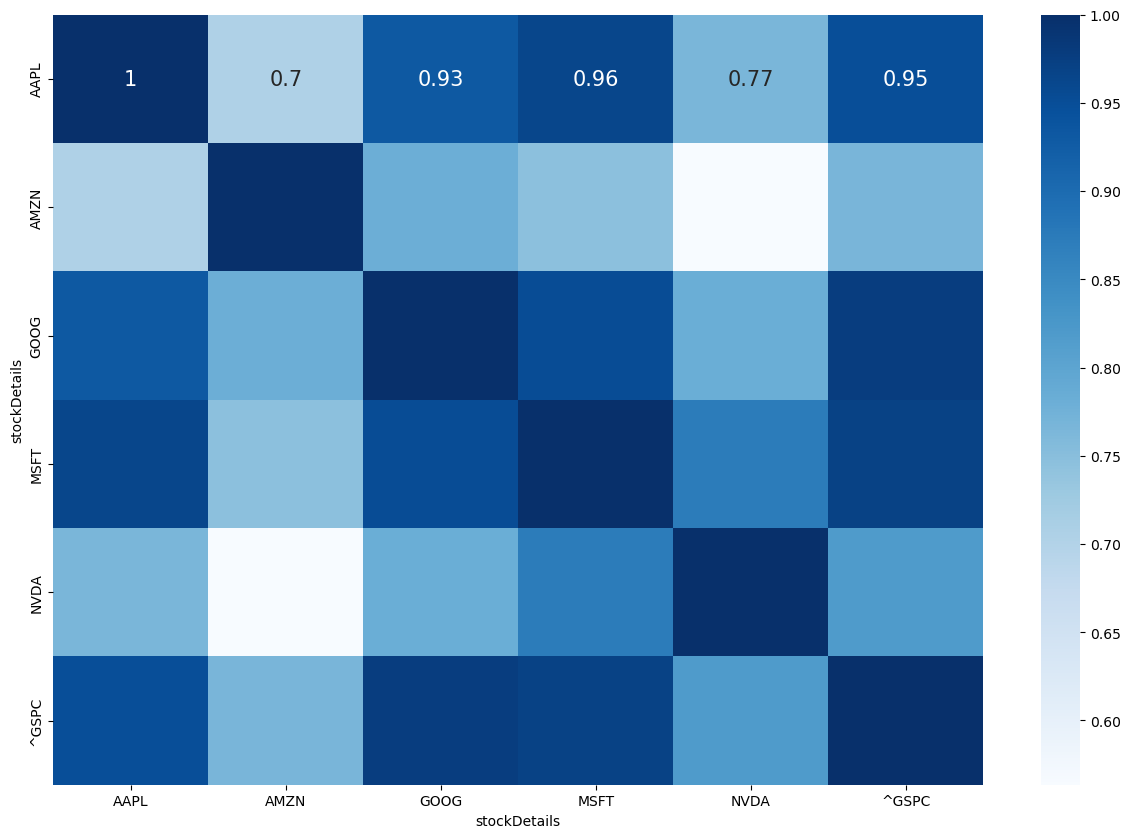

In [35]:
# Heatmap for the technology returns correlation 

plt.figure(figsize=(15,10))
sns.heatmap(stockReturns_cum.corr(),annot=True,cmap="Blues",annot_kws={"fontsize":15})
plt.show()

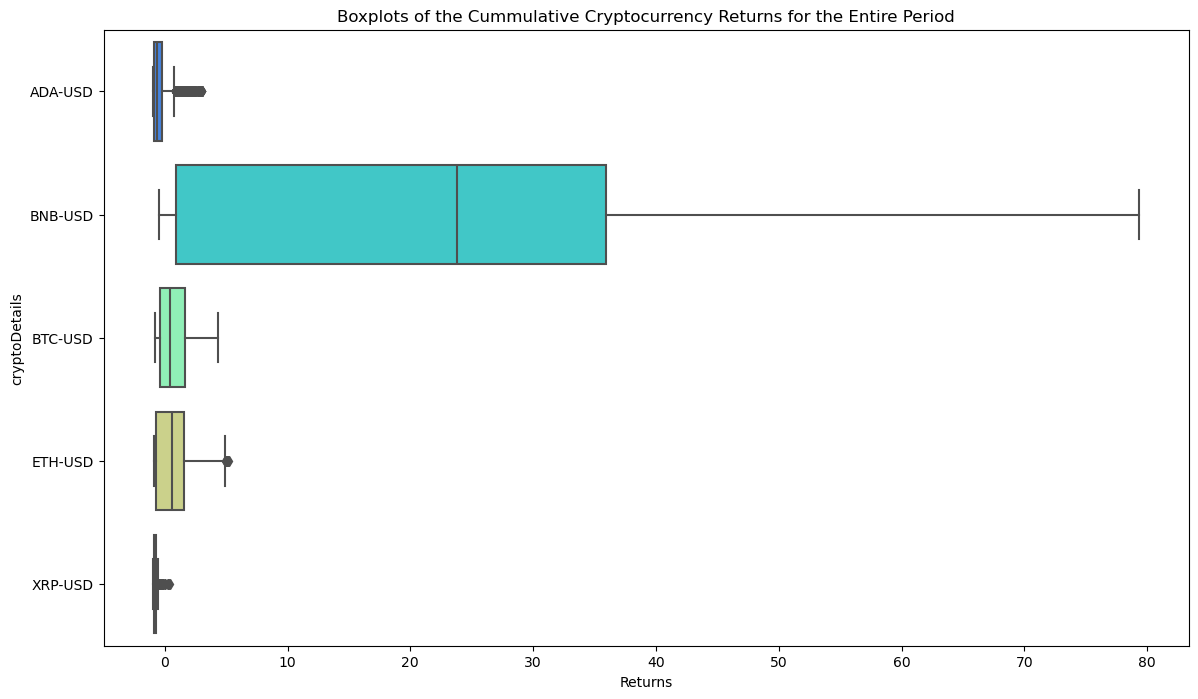

In [36]:
# Boxplot for the cryptocurrency cumulative returns

fig,ax = plt.subplots(figsize=(14,8))
sns.boxplot(data=cumCryptoReturns,palette='rainbow',ax=ax,orient='h')
plt.xlabel('Returns')
plt.title("Boxplots of the Cummulative Cryptocurrency Returns for the Entire Period")
plt.show()

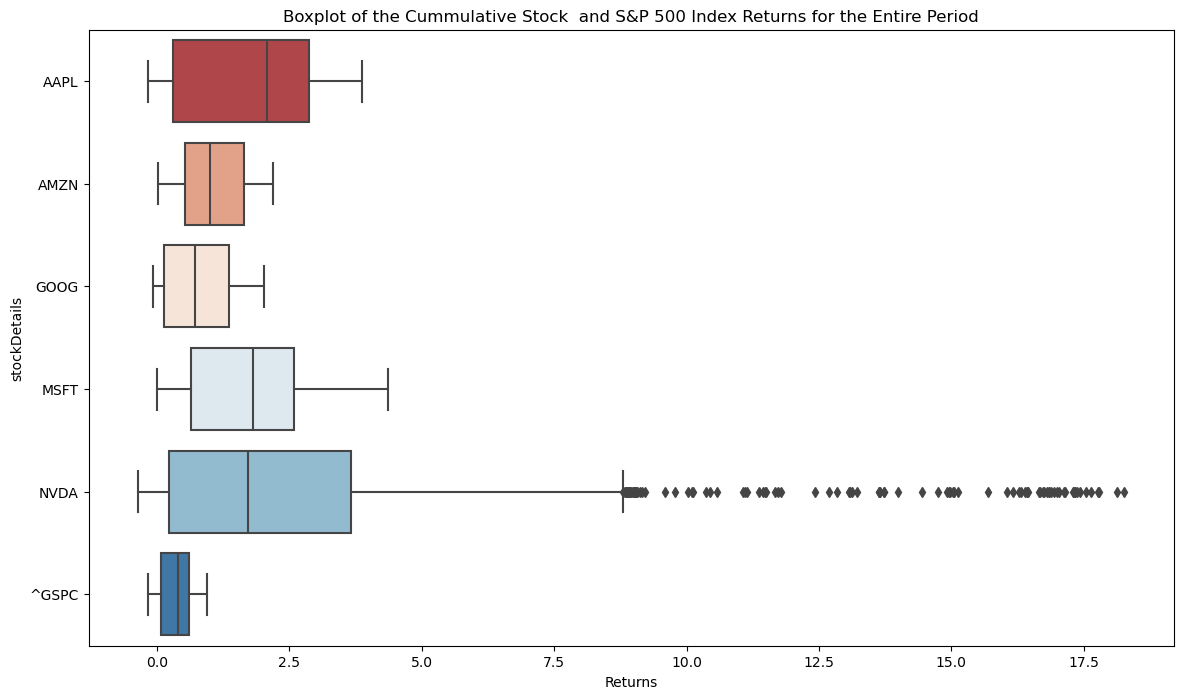

In [37]:
# Boxplot for the technology stock cumulative returns and S&P 500 Index

fig,ax = plt.subplots(figsize=(14,8))
sns.boxplot(data=stockReturns_cum,palette='RdBu',ax=ax,orient='h')
plt.xlabel('Returns')
plt.title("Boxplot of the Cummulative Stock  and S&P 500 Index Returns for the Entire Period")
plt.show()

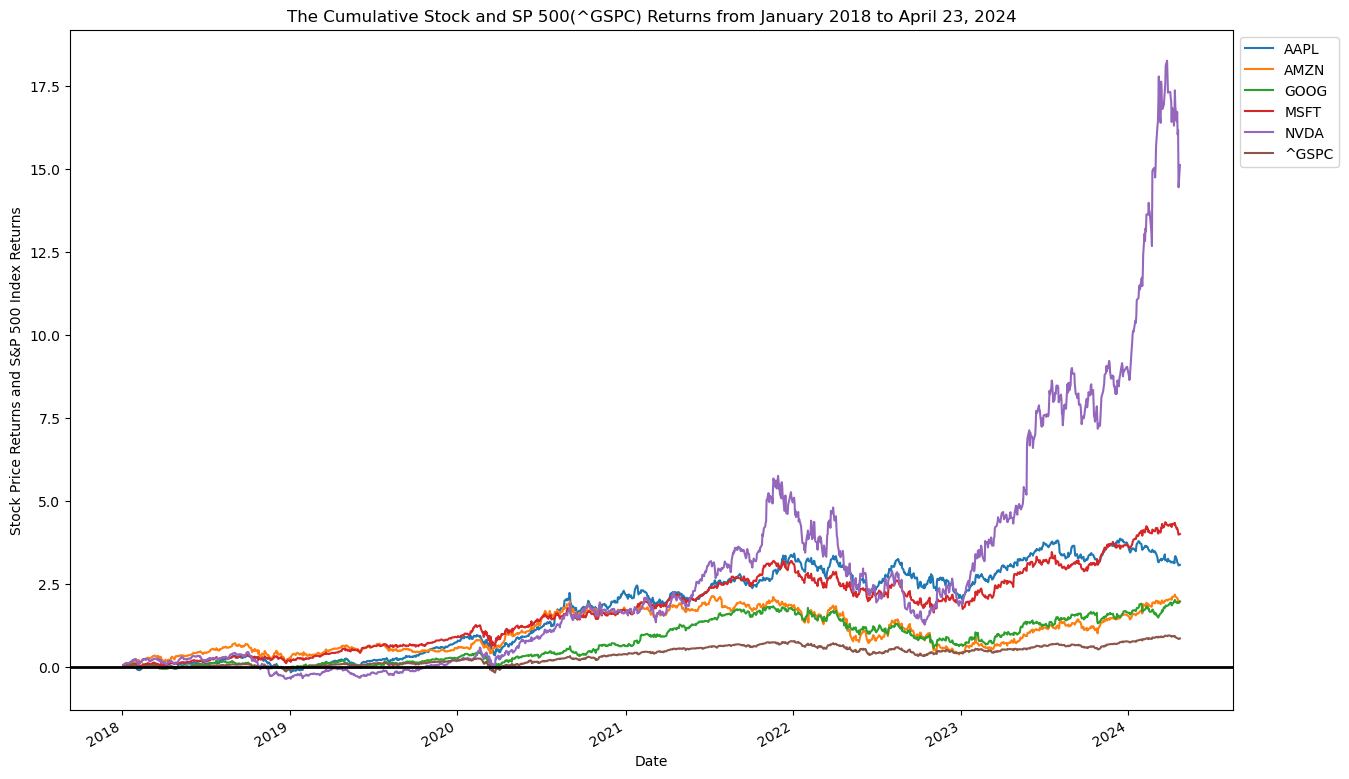

In [38]:
# To show the returns pattern movement for the entire period for stocks and S&P 500

stockReturns_cum.plot(figsize=(15, 10)).axhline(color='black', linewidth=2)
plt.ylabel('Stock Price Returns and S&P 500 Index Returns')
plt.title("The Cumulative Stock and SP 500(^GSPC) Returns from January 2018 to April 23, 2024")
plt.legend(bbox_to_anchor=(1,1))

#stockReturns_cum.iplot()

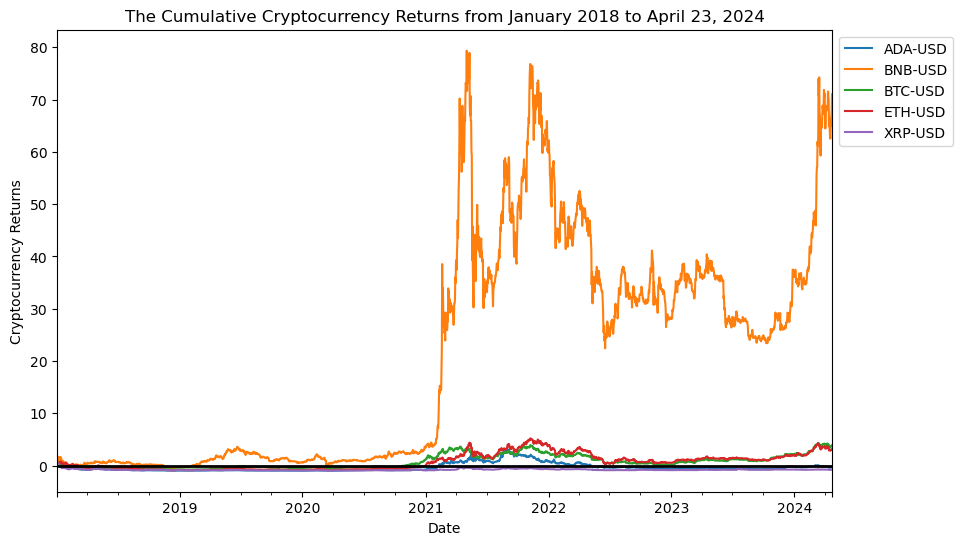

In [39]:
# To show the returns pattern movement for the entire period 

cumCryptoReturns.plot(figsize=(10, 6)).axhline(color='black', linewidth=2)
plt.ylabel('Cryptocurrency Returns')
plt.title("The Cumulative Cryptocurrency Returns from January 2018 to April 23, 2024")
plt.legend(bbox_to_anchor=(1,1))



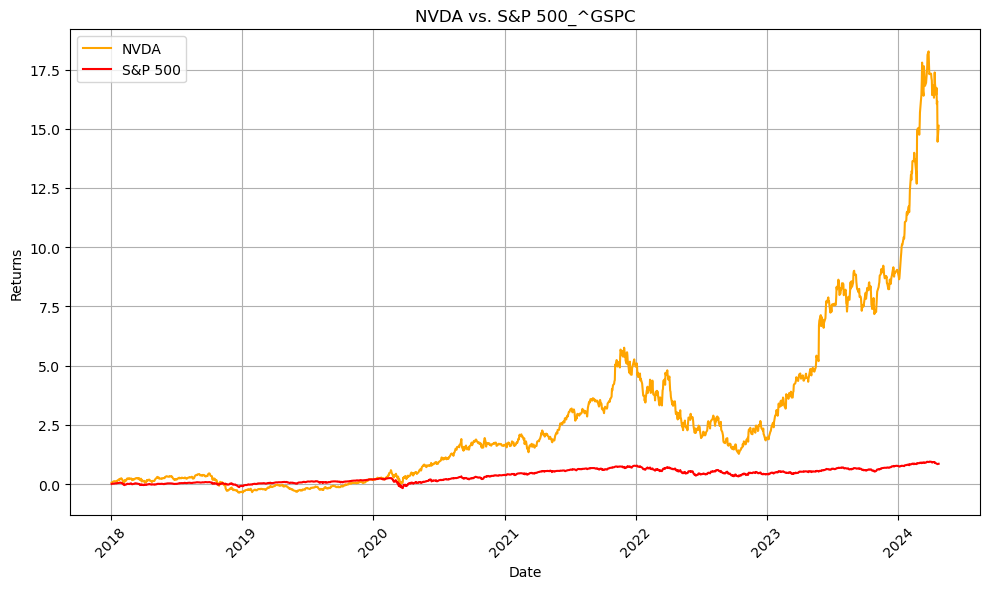

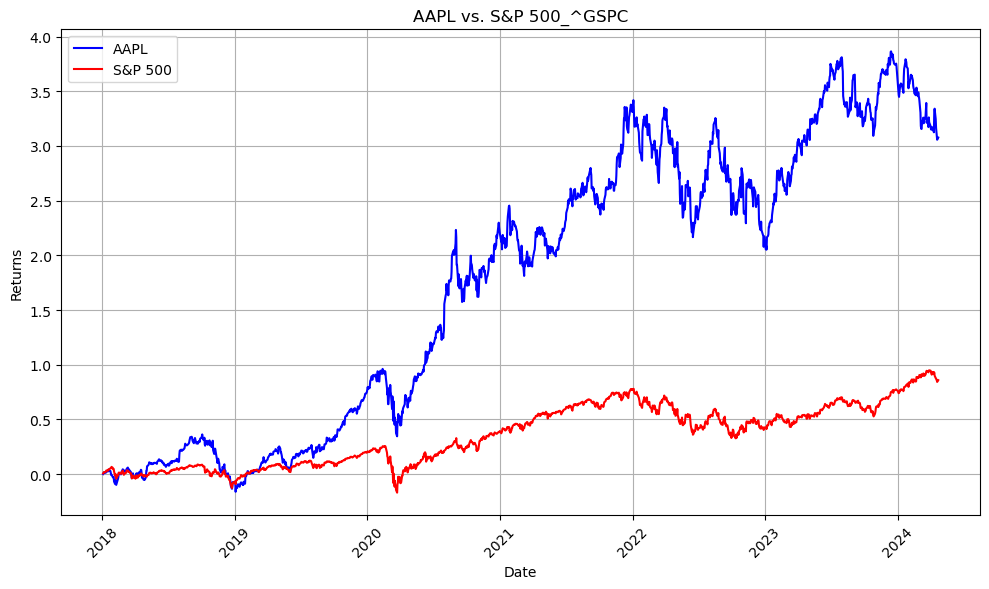

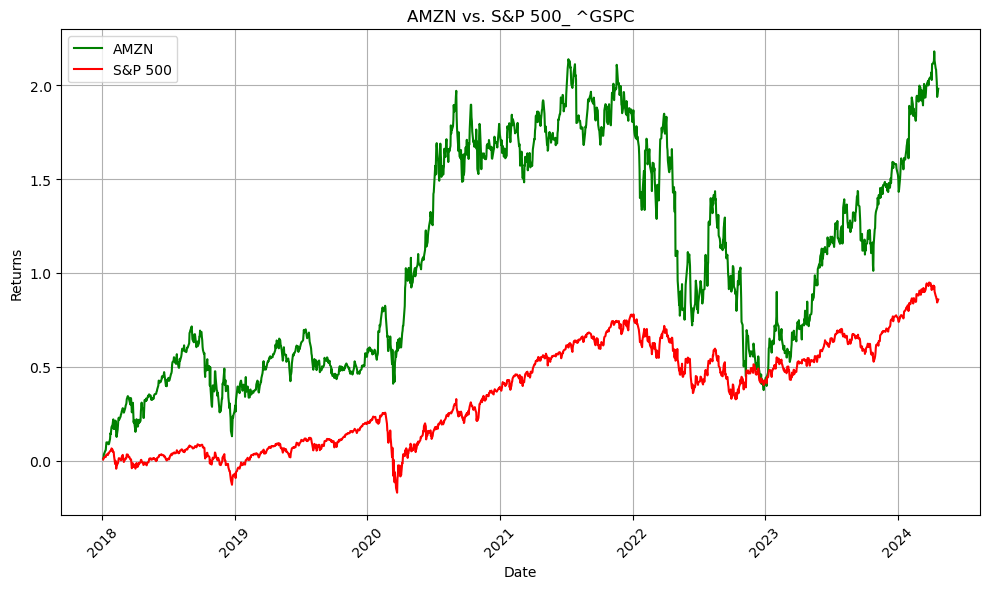

In [40]:

# Plotting NVDA vs.S&P 500_ ^GSPC

plt.figure(figsize=(10, 6))
plt.plot(stockReturns_cum.index, stockReturns_cum['NVDA'], label='NVDA', color='orange')
plt.plot(stockReturns_cum.index, stockReturns_cum['^GSPC'], label='S&P 500', color='red')
plt.title('NVDA vs. S&P 500_^GSPC')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Plotting AAPL vs. S&P 500 ^GSPC

plt.figure(figsize=(10, 6))
plt.plot(stockReturns_cum.index, stockReturns_cum['AAPL'], label='AAPL', color='blue')
plt.plot(stockReturns_cum.index, stockReturns_cum['^GSPC'], label='S&P 500', color='red')
plt.title('AAPL vs. S&P 500_^GSPC')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting AMZN vs. ^GSPC

plt.figure(figsize=(10, 6))
plt.plot(stockReturns_cum.index, stockReturns_cum['AMZN'], label='AMZN', color='green')
plt.plot(stockReturns_cum.index, stockReturns_cum['^GSPC'], label='S&P 500', color='red')
plt.title('AMZN vs. S&P 500_ ^GSPC')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

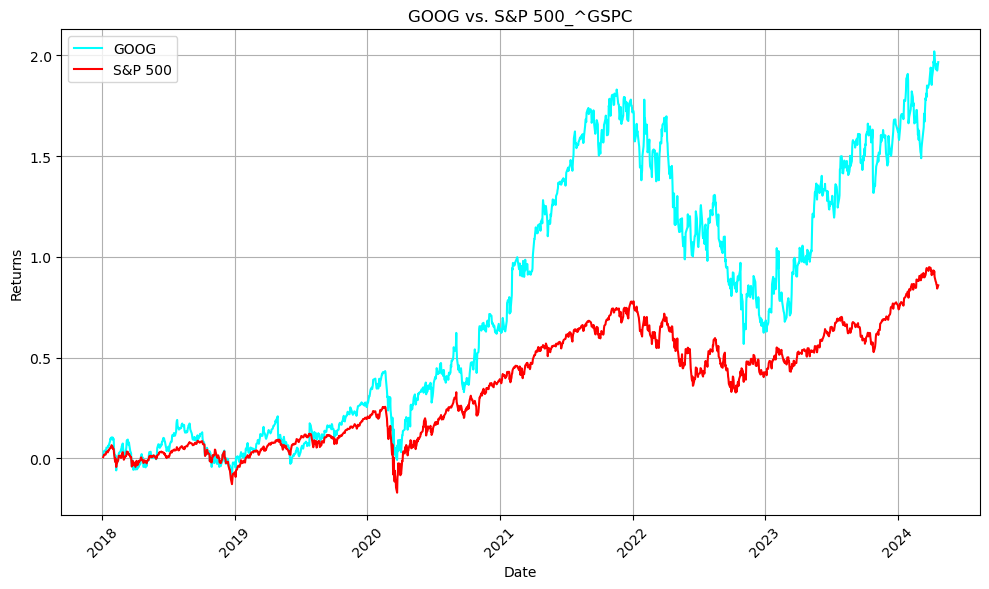

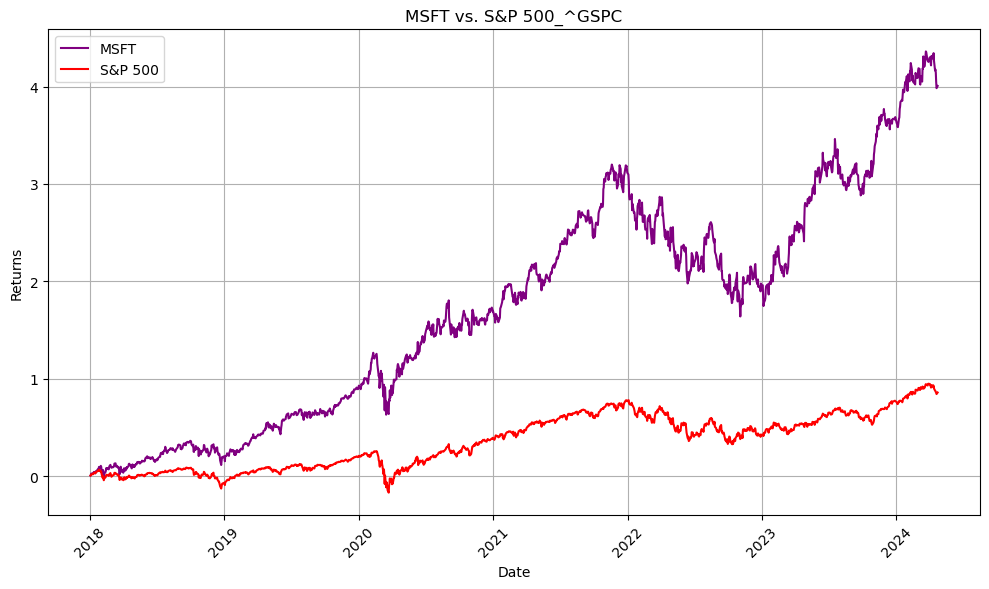

In [41]:
# Plotting GOOG vs. S&P 500_ ^GSPC

plt.figure(figsize=(10, 6))
plt.plot(stockReturns_cum.index, stockReturns_cum['GOOG'], label='GOOG', color='cyan')
plt.plot(stockReturns_cum.index, stockReturns_cum['^GSPC'], label='S&P 500', color='red')
plt.title('GOOG vs. S&P 500_^GSPC')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting MSFT vs.S&P 500_ ^GSPC

plt.figure(figsize=(10, 6))
plt.plot(stockReturns_cum.index, stockReturns_cum['MSFT'], label='MSFT', color='purple')
plt.plot(stockReturns_cum.index, stockReturns_cum['^GSPC'], label='S&P 500', color='red')
plt.title('MSFT vs. S&P 500_^GSPC')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## TEST OF HYPOTHESIS : STATISTICAL ANALYSIS

### Performed hypothesis test between the stock with the highest return [NVDA] and the cryptocurrency with the highest return[BNB-USD] to check whether there is a difference between the average returns

### H0:μNVDA = μBNB-USD (Null Hypothesis)
### HA:μNVDA ≠ μBNB-USD (Alternate Hypothesis)


In [42]:
# Import the necessary library for test of hypothesis

import scipy.stats as stats

In [43]:
# Descriptive statistics of stock cumulative returns

stockReturns_cum.describe()

stockDetails,AAPL,AMZN,GOOG,MSFT,NVDA,^GSPC
count,1585.000000,1585.000000,1585.000000,1585.000000,1585.000000,1585.000000
mean,1.758080,1.061275,0.770038,1.727135,2.778979,0.356941
std,1.287098,0.578421,0.625561,1.154856,3.605619,0.275313
min,-0.162036,0.012784,-0.083380,-0.010864,-0.360779,-0.170045
25%,0.295550,0.532885,0.132019,0.631993,0.220645,0.077591
50%,2.070814,0.991590,0.712676,1.820180,1.712229,0.399898
75%,2.874109,1.639361,1.367700,2.588786,3.653012,0.594645
max,3.865011,2.179983,2.019531,4.361763,18.266275,0.949080


In [44]:
# Descriptive statistics of cumulative cumulative returns

cumCryptoReturns.describe()

cryptoDetails,ADA-USD,BNB-USD,BTC-USD,ETH-USD,XRP-USD
count,2303.000000,2303.000000,2303.000000,2303.000000,2303.000000
mean,-0.343145,20.773257,0.716894,0.734918,-0.781280
std,0.776611,21.506878,1.279219,1.509399,0.133486
min,-0.967116,-0.461356,-0.763000,-0.890881,-0.941600
25%,-0.887278,0.951249,-0.370473,-0.696728,-0.870196
50%,-0.599187,23.765755,0.402736,0.574990,-0.810287
75%,-0.213969,35.960166,1.679260,1.551809,-0.738965
max,3.073575,79.342449,4.351280,5.228114,0.412701


### H0:μNVDA = μBNB-USD (Null Hypothesis)
### HA:μNVDA ≠ μBNB-USD (Alternate Hypothesis)

In [45]:
# Perform Two independent samples t-test for unequal variances

# If the p-value is less than the significance level of 0.05,we reject the null hypothesis
# and conclude that at least one of the stock returns has a different mean from the cryptocurrency returns.

# If the p-value is greater than the significance level of 0.05, we fail to reject the null hypothesis,
# shows that no significant difference between the stock returns.


from scipy import stats


# Perform the t-test

t_statistic, p_value = stats.ttest_ind(stockReturns_cum['NVDA'],cumCryptoReturns['BNB-USD'],equal_var=False)

# Print the results


# Set the significance level (alpha)
alpha = 0.05


print("Two-Sample T-Test Results:")

# Check for significance
if p_value < alpha:
    print("We reject the null hypothesis: There is a significant difference in returns between cryptocurrency and stock.")
else:
    print("Fail to reject the null hypothesis:There is no significant difference in returns between cryptocurrency and stock.")
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

Two-Sample T-Test Results:
We reject the null hypothesis: There is a significant difference in returns between cryptocurrency and stock.
T-Statistic: -39.35612637506388
P-Value: 8.490984606644996e-264


### Performed 2nd hypothesis test between the technology stock with the highest  market capitalization [MSFT] and the cryptocurrency with the highest market capitalization[BTC-USD] to check whether there is a difference between the average returns

### H0:μMSFT = μBTC-USD (Null Hypothesis)
### HA:μMSFT ≠ μBTC-USD (Alternate Hypothesis)

In [46]:
# Perform Two independent samples t-test for unequal variances 

# If the p-value is less than the significance level of 0.05,we reject the null hypothesis
# and conclude that at least one of the stock returns has a different mean from the cryptocurrency returns.

# If the p-value is greater than the significance level of 0.05, we fail to reject the null hypothesis,
# shows that no significant difference between the stock returns.


from scipy import stats


# Perform the t-test
t_statistic, p_value = stats.ttest_ind(stockReturns_cum['MSFT'],cumCryptoReturns['BTC-USD'],equal_var=False)

# Print the results


# Set the significance level (alpha)
alpha = 0.05


print("Two-Sample T-Test Results:")

# Check for significance
if p_value < alpha:
    print("We reject the null hypothesis: There is a significant difference in returns between cryptocurrency and stock.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in returns between cryptocurrency and stock.")
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

Two-Sample T-Test Results:
We reject the null hypothesis: There is a significant difference in returns between cryptocurrency and stock.
T-Statistic: 25.64362531712103
P-Value: 2.1579426153025816e-133


### 3rd hypothesis test between the S&P 500 (GSPC) and the cryptocurrency with the highest market capitalization[BTC-USD] to check whether there is a difference between the average returns

### H0:μS&P500 = μBTC-USD (Null Hypothesis)
### HA:μS&P500 ≠ μBTC-USD (Alternate Hypothesis)

In [47]:
# Perform Two independent samples t-test for unequal variances 

# If the p-value is less than the significance level of 0.05,we reject the null hypothesis
# and conclude that at least one of the stock returns has a different mean from the cryptocurrency returns.

# If the p-value is greater than the significance level of 0.05, we fail to reject the null hypothesis,
# shows that no significant difference between the stock returns.


from scipy import stats


# Perform the t-test
t_statistic, p_value = stats.ttest_ind(stockReturns_cum['^GSPC'],cumCryptoReturns['BTC-USD'],equal_var=False)

# Print the results


# Set the significance level (alpha)
alpha = 0.05


print("Two-Sample T-Test Results:")

# Check for significance
if p_value < alpha:
    print("We reject the null hypothesis: There is a significant difference in returns between cryptocurrency and stock.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in returns between cryptocurrency and stock.")
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

Two-Sample T-Test Results:
We reject the null hypothesis: There is a significant difference in returns between cryptocurrency and stock.
T-Statistic: -13.070852363243649
P-Value: 7.306043196075598e-38


#

## BETA CALCULATION :      FOR INVESTMENT RISK 

### Calculated the beta for the investment risk between the market S&P 500 index and the stock with the highest return NVDIA [NVDA] 

In [48]:
# Calculate the investment risk between the stock with the highest cummulative returns NVDIA and
# the benchmark market S&P 500

def beta_stock(returns_investment, SP500market):
    """
    Calculate the beta of stock investment given its returns and the returns of the market.

    Args:
    returns_investment (array-like): Returns of the investment.
    returns_market (array-like): Returns of the market index.

    Returns:
    float: Beta of the investment.
    """
    covariance = np.cov(returns_investment, SP500market)[0, 1]
    market_variance = np.var(SP500market)
    
    beta = covariance / market_variance
    return beta

# Sample historical returns for the investment and the market index

returns_investment = stockReturns_cum['NVDA']
SP500market = stockReturns_cum['^GSPC']

# Calculate beta

investment_beta = beta_stock(returns_investment, SP500market)
print("Beta (risk) of the investment for NVDA stock is :", investment_beta)


Beta (risk) of the investment for NVDA stock is : 10.731079322875184


### - There is no cryptocurrency benchmark market like S&P 500 therefore for this project purpose,we can only compare the cryptocurrency returns with S&P 500.

### - In addition, cryptocurrencies are traded 365 days/ year(7 days a week including holidays) while stocks are traded only 5 days a week excluding public holidays.

## For the purpose of calculating risk and volatility for cryptocurrencies:

### - We will use standard deviation of the cummulative returns 

### - Extrapolate the risk(beta) from the stock returns vs S&P 500 and cryptocurrency returns vs Bitcoin(BTC-USD)

### - Finally,we used the Bitcoin (BTC-USD) as the benchmark to compare other cryptocurrencies returns since it is the most dominant and most capitalized cryptocurrency due to non-existence and non-availabilty of Bitcoin market index similar to the S&P 500

In [49]:
# The standard deviation for the cummulative returns of the cryptocurrencies

cumCryptoReturns.std()

cryptoDetails
ADA-USD     0.776611
BNB-USD    21.506878
BTC-USD     1.279219
ETH-USD     1.509399
XRP-USD     0.133486
dtype: float64

In [50]:
# The standard deviation for the cummulative returns of the stocks

stockReturns_cum.std()

stockDetails
AAPL     1.287098
AMZN     0.578421
GOOG     0.625561
MSFT     1.154856
NVDA     3.605619
^GSPC    0.275313
dtype: float64

In [51]:
# Calculate the investment risk between the cryptocurrency with the highest cummulative returns BNB-USD and
# Bitcoin (BTC-USD) as our market benchmark for risk assessment

def beta_crypto(crypto_investment, BitcoinMarket):
    """
    Calculate the beta of cryptocurrency investment given its returns and the returns of the market.

    Args:
    returns_investment (array-like): Returns of the investment.
    returns_market (array-like): Returns of the market index.

    Returns:
    float: Beta of the investment.
    """
    covariance = np.cov(crypto_investment, BitcoinMarket)[0, 1]
    btc_variance = np.var(BitcoinMarket)
    
    beta = covariance / btc_variance
    return beta

# Sample historical returns for the investment and the market index

crypto_investment = cumCryptoReturns['BNB-USD']
BitcoinMarket = cumCryptoReturns['BTC-USD']

# Calculate beta

investment_beta = beta_crypto(crypto_investment, BitcoinMarket)
print("Beta (risk) of the investment for BNB-USD cryptocurrency is :", investment_beta)


Beta (risk) of the investment for BNB-USD cryptocurrency is : 14.96562784241421


## MACHINE LEARNING ALGORITHMS

## LINEAR REGRESSION : NVDA stock vs S&P 500 

In [52]:
# Import warnings to avoid unnecessary warnings

import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


In [53]:
# Import libraries for Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,auc,roc_curve
from sklearn.metrics import r2_score


# import dmba
from dmba import regressionSummary, classificationSummary, liftChart, gainsChart

%matplotlib inline

In [54]:
# Create a LinearRegression

lreg = LinearRegression()

In [55]:
stockReturns_cum


stockDetails,AAPL,AMZN,GOOG,MSFT,NVDA,^GSPC
Date,,,,,,
2018-01-03,-0.000246,0.012784,0.016338,0.004620,0.065910,0.006399
2018-01-04,0.004426,0.017325,0.020094,0.013487,0.071385,0.010453
2018-01-05,0.015982,0.033810,0.034930,0.026099,0.080511,0.017561
2018-01-08,0.012048,0.048612,0.039437,0.027098,0.113567,0.019252
2018-01-09,0.012048,0.053490,0.038685,0.026474,0.113364,0.020580
...,...,...,...,...,...,...
2024-04-16,3.164741,2.083600,1.929577,4.177073,16.727641,0.873800
2024-04-17,3.130809,2.049285,1.946103,4.142857,16.042182,0.862969
2024-04-18,3.107204,2.014634,1.956995,4.048327,16.171162,0.858855


In [56]:
# Extract ^GSPC and NVDA returns as numpy arrays
# intialising the minmax scaler.

gspc_returns = stockReturns_cum['^GSPC'].values.reshape(-1, 1)  # Reshape to 2D array for sklearn
nvda_returns = stockReturns_cum['NVDA'].values



In [57]:
# Initialize and fit the linear regression model

model = LinearRegression()
model.fit(gspc_returns, nvda_returns)



LinearRegression()

Intercept: -1.048966716945964
Coefficient: 10.724308925826051
R-squared: 0.6705512305801838


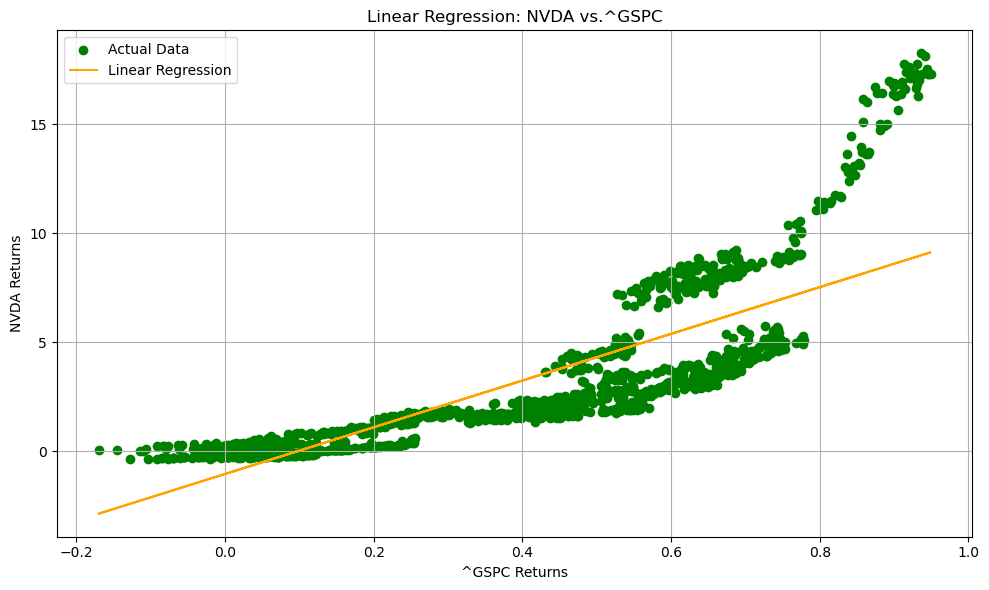

In [58]:

# Predict NVDA returns based on ^GSPC returns
predicted_nvda = model.predict(gspc_returns)

# Calculate R-squared
r_squared = r2_score(nvda_returns,predicted_nvda)

# Print the coefficients
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_[0])

# Print the R-squared value
print("R-squared:", r_squared)


# Plot the linear regression line
plt.figure(figsize=(10, 6))
plt.scatter(gspc_returns, nvda_returns, color='green', label='Actual Data')
plt.plot(gspc_returns, predicted_nvda, color='orange', label='Linear Regression')
plt.title('Linear Regression: NVDA vs.^GSPC')
plt.xlabel('^GSPC Returns')
plt.ylabel('NVDA Returns')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Use Linear Regression to predict the Adjusted close price and then apply .pct_change to get the returns

In [59]:
# Predict the close price of NVDA using linear regressions
nvda = techStock_data.loc[:,(slice(None),['NVDA',])]
nvda

Tickername,Adj Close,Close,High,Low,Open,Volume
stockDetails,NVDA,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,,
2018-01-02,49.31,49.84,49.88,48.62,48.94,35561600
2018-01-03,52.56,53.12,53.42,50.94,51.03,91470400
2018-01-04,52.83,53.40,54.51,53.17,53.94,58326800
2018-01-05,53.28,53.85,54.23,52.77,53.55,58012400
2018-01-08,54.91,55.50,56.25,54.65,55.10,88121600
...,...,...,...,...,...,...
2024-04-16,874.15,874.15,881.18,860.64,864.33,37045300
2024-04-17,840.35,840.35,887.75,839.50,883.40,49540000


In [60]:
nvda.columns = ['Adj Close','Close','High','Low','Open','Volume']

In [61]:
# Get the adjusted close price for NVDA stock

df_nvda = nvda.drop(columns=['Adj Close'])
df_nvdaadjclose=nvda['Adj Close']
df_nvdaadjclose

Date
2018-01-02     49.31
2018-01-03     52.56
2018-01-04     52.83
2018-01-05     53.28
2018-01-08     54.91
               ...  
2024-04-16    874.15
2024-04-17    840.35
2024-04-18    846.71
2024-04-19    762.00
2024-04-22    795.18
Name: Adj Close, Length: 1586, dtype: float64

In [62]:
# Get the NVDA stock dataset

df_nvda

,Close,High,Low,Open,Volume
Date,,,,,
2018-01-02,49.84,49.88,48.62,48.94,35561600
2018-01-03,53.12,53.42,50.94,51.03,91470400
2018-01-04,53.40,54.51,53.17,53.94,58326800
2018-01-05,53.85,54.23,52.77,53.55,58012400
2018-01-08,55.50,56.25,54.65,55.10,88121600
...,...,...,...,...,...
2024-04-16,874.15,881.18,860.64,864.33,37045300
2024-04-17,840.35,887.75,839.50,883.40,49540000
2024-04-18,846.71,861.90,824.02,849.70,44726000


In [63]:
# The independent variables

X = df_nvda
X.values

array([[4.98400e+01, 4.98800e+01, 4.86200e+01, 4.89400e+01, 3.55616e+07],
       [5.31200e+01, 5.34200e+01, 5.09400e+01, 5.10300e+01, 9.14704e+07],
       [5.34000e+01, 5.45100e+01, 5.31700e+01, 5.39400e+01, 5.83268e+07],
       ...,
       [8.46710e+02, 8.61900e+02, 8.24020e+02, 8.49700e+02, 4.47260e+07],
       [7.62000e+02, 8.43240e+02, 7.56060e+02, 8.31500e+02, 8.71905e+07],
       [7.95180e+02, 8.00730e+02, 7.64000e+02, 7.81040e+02, 5.96341e+07]])

In [64]:
# Dependent variable

y = df_nvdaadjclose.values
y

array([ 49.31,  52.56,  52.83, ..., 846.71, 762.  , 795.18])

In [65]:
# Train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [66]:
# Print the shape of the training set 

print(X_train.shape)

(1110, 5)


In [67]:
# Print the shape of the test set

print(X_test.shape)

(476, 5)


### Training the Model Linear Regression

In [68]:
# Train the regression model
# Fit the model

regressor = LinearRegression()

model = regressor.fit(X_train,y_train)

In [69]:
# Predict

predicted = regressor.predict(X_test)

### Prediction

In [70]:
predicted

array([191.80565251, 495.11926811,  61.48176386, 387.53932399,
        43.9640323 , 423.03145377,  62.06507836, 201.86067314,
        57.03988485, 213.03930354,  38.93444123, 206.10764438,
        43.98004634,  67.19449596, 269.19405695,  66.71343145,
        36.26014028, 149.31805393,  65.18087018,  61.3728395 ,
       236.40477583,  50.38299422,  56.23900327, 433.29951126,
        39.20835661, 219.76910627, 423.90742848, 133.52420803,
       700.99028733,  65.95465245, 391.55244455,  39.66172671,
       187.60638472,  61.04995188, 721.34774019, 133.14100599,
        63.77068524, 496.45602155, 881.95484634, 128.43833285,
       155.72247603, 176.78400135, 101.62367331,  67.99312143,
       233.50097368, 210.49219769, 134.85232791, 125.92070773,
       296.18864891,  60.0479202 ,  54.921885  ,  48.75654145,
       129.93781134, 136.84299525, 460.82737826, 218.74404479,
        72.50716983,  52.6951732 , 209.17183806,  92.29216831,
       266.88599951, 157.21258112,  55.15008299, 547.02

### Validating the Fit


In [71]:
print('Model Coefficients:',regressor.coef_)
print('Model Intercept:',regressor.intercept_)

Model Coefficients: [ 1.00004214e+00 -2.00248427e-05  1.53427653e-03 -9.99536647e-04
  1.62255658e-10]
Model Intercept: -0.3775280702809596


### Prediction Table to show Actual Prices and Predicted Prices

In [72]:
df_table = pd.DataFrame(y_test,predicted)
final_df = pd.DataFrame({'Actual Price':y_test,'Predicted_Price':predicted})
final_df

,Actual Price,Predicted_Price
0,191.75,191.805653
1,495.20,495.119268
2,61.58,61.481764
3,387.62,387.539324
4,44.01,43.964032
...,...,...
471,242.20,242.037235
472,385.02,384.936061
473,908.88,908.979471
474,131.88,131.682490


### Apply .pct_change() on the predicted adjusted close price to compare the returns

In [73]:
returnsnvda = df_nvdaadjclose.pct_change()

In [74]:
returnsnvda

Date
2018-01-02         NaN
2018-01-03    0.065910
2018-01-04    0.005137
2018-01-05    0.008518
2018-01-08    0.030593
                ...   
2024-04-16    0.016442
2024-04-17   -0.038666
2024-04-18    0.007568
2024-04-19   -0.100046
2024-04-22    0.043543
Name: Adj Close, Length: 1586, dtype: float64

In [75]:
# To get the cumulative returns of the predicted close price

cumreturnsnvda = (returnsnvda + 1).cumprod()-1

In [76]:
# To check the predicted close price returns

y=cumreturnsnvda.dropna()
y1=y
y1= pd.DataFrame(y,)
y1.columns
y1 = y1.rename(columns={'Adj Close': 'CumReturns'})

y1

,CumReturns
Date,
2018-01-03,0.065910
2018-01-04,0.071385
2018-01-05,0.080511
2018-01-08,0.113567
2018-01-09,0.113364
...,...
2024-04-16,16.727641
2024-04-17,16.042182
2024-04-18,16.171162


### Evaluate the Model

In [77]:
# To evaluate the model

import math
from sklearn.metrics import confusion_matrix,accuracy_score
regressionSummary(y_test,predicted)


Regression statistics

                      Mean Error (ME) : -0.0035
       Root Mean Squared Error (RMSE) : 0.1388
            Mean Absolute Error (MAE) : 0.1124
          Mean Percentage Error (MPE) : -0.0005
Mean Absolute Percentage Error (MAPE) : 0.1328


### Model Accuracy

In [78]:
# The model accuracy

a2 = abs(predicted - y_test)
b2 = 100 * (a2/y_test)
accuracy = 100 - np.mean(b2)
print('Accuracy:',round(accuracy,2),'%')

Accuracy: 99.87 %


In [79]:

X=df_nvda
X=X.iloc[1:]
X1=X
X1

,Close,High,Low,Open,Volume
Date,,,,,
2018-01-03,53.12,53.42,50.94,51.03,91470400
2018-01-04,53.40,54.51,53.17,53.94,58326800
2018-01-05,53.85,54.23,52.77,53.55,58012400
2018-01-08,55.50,56.25,54.65,55.10,88121600
2018-01-09,55.49,55.96,54.66,55.56,49700000
...,...,...,...,...,...
2024-04-16,874.15,881.18,860.64,864.33,37045300
2024-04-17,840.35,887.75,839.50,883.40,49540000
2024-04-18,846.71,861.90,824.02,849.70,44726000


## K-Nearest Neighbors

In [80]:
# Get the standard scaler and fit_transform

from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
X_norm = scaler1.fit_transform(X1)

In [81]:
# This code block prints the shape of the partitions

train_X, valid_X, train_y, valid_y = train_test_split(X_norm, y1, test_size=0.4, random_state=36)
print(train_X.shape, train_y.shape)
print(valid_X.shape, valid_y.shape)

(951, 5) (951, 1)
(634, 5) (634, 1)


In [82]:

# This code block trains a regressor for different values of k and print MSE

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
results = []
for k in range(1,5):
    knn1 = KNeighborsRegressor(n_neighbors=k).fit(train_X, train_y)
    valid_y_pred = knn1.predict(valid_X)
    results.append({
        'k': k,
        'MSE': mean_squared_error(valid_y, valid_y_pred)
    })
mse = mean_squared_error(valid_y, valid_y_pred)
# Convert results to a pandas data frame
results = pd.DataFrame(results)
print(results)

   k       MSE
0  1  0.028433
1  2  0.018778
2  3  0.018239
3  4  0.017537


In [83]:
# This code block creates a new data frame with new data

nvdatest = pd.DataFrame([{
    'Close': 900,
    'High': 1000,
    'Low': 874,
    'Open': 889,
    'Volume': 87194800,
}])
nvdatest


,Close,High,Low,Open,Volume
0,900,1000,874,889,87194800


In [84]:
# Transform the new data

nvdatestnorm = scaler1.transform(nvdatest)

In [85]:
# This code block predicts the for the given record, with k=2 as 2 has the lowest MSE.
# The code gets the Euclidean distances between the data points

knn2=KNeighborsRegressor(n_neighbors=2).fit(train_X, train_y)
distances, indices = knn2.kneighbors(nvdatestnorm)
print(knn2.predict(nvdatestnorm))
print('Distances',distances)
print('Indices', indices)
print(X_norm[indices, :])

[[17.53589536]]
Distances [[1.06703399 1.216243  ]]
Indices [[668 592]]
[[[-0.31035995 -0.32323808 -0.32444959 -0.33625804  0.27309623]
  [-0.61124123 -0.5982264  -0.60283094 -0.59215997  0.06537979]]]


In [86]:
# Get the mean square error

train_predictions = knn2.predict(train_X)
print("Mean Squared Error on the training set:", mean_squared_error(train_y, train_predictions))

Mean Squared Error on the training set: 0.008463824132832589


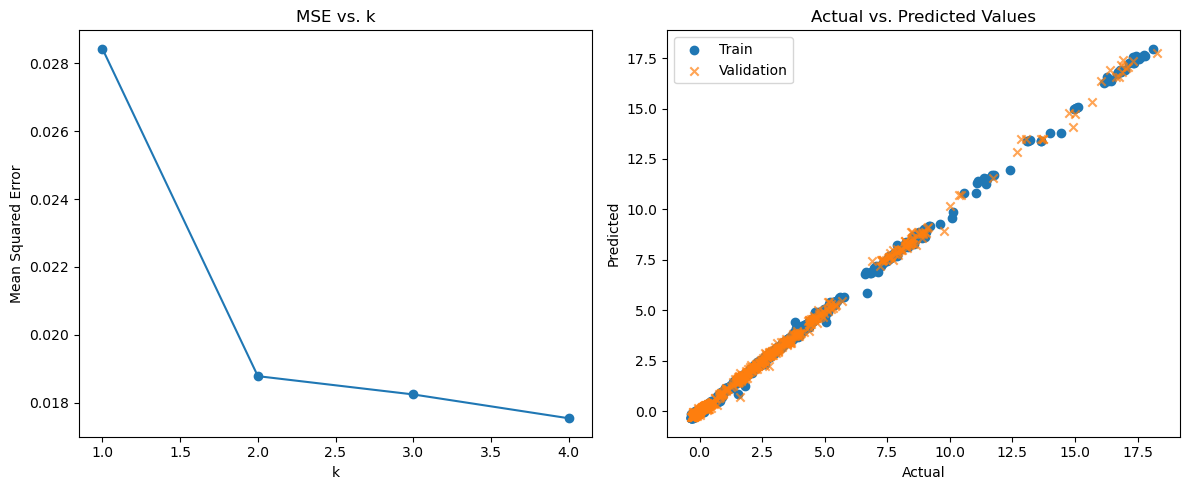

In [87]:
import matplotlib.pyplot as plt

# Data for plotting MSE

k_values = results['k']
mse_values = results['MSE']

# Plotting the MSE values

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, mse_values, marker='o')
plt.xlabel('k')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs. k')

# Scatter plot for actual vs. predicted values

plt.subplot(1, 2, 2)
plt.scatter(train_y, train_predictions, label='Train')
plt.scatter(valid_y, valid_y_pred, label='Validation', alpha=0.7, marker='x')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.title('Actual vs. Predicted Values')

plt.tight_layout()
plt.show()

# KNN FOR  BNB-USD  CRYPTOCURRENCY

In [88]:
bnb = crypto_data.loc[:,(slice(None),['BNB-USD',])]
bnb

TickerName,Adj Close,Close,High,Low,Open,Volume
cryptoDetails,BNB-USD,BNB-USD,BNB-USD,BNB-USD,BNB-USD,BNB-USD
Date,,,,,,
2018-01-01,8.41,8.41,8.70,7.96,8.63,66422800
2018-01-02,8.84,8.84,9.12,8.22,8.46,104789000
2018-01-03,9.54,9.54,9.58,8.53,8.77,108852000
2018-01-04,9.21,9.21,9.54,8.85,9.45,158819008
2018-01-05,14.92,14.92,16.72,9.09,9.15,341504992
...,...,...,...,...,...,...
2024-04-18,552.17,552.17,555.04,527.43,534.41,1439312699
2024-04-19,554.89,554.89,564.54,525.03,552.17,1320094794


In [89]:
# The columns of the data

bnb.columns = ['Adj Close','Close','High','Low','Open','Volume']

In [90]:
# Use the adjusted close price to get the returns

bnbreturns= bnb['Adj Close']
bnbreturns


Date
2018-01-01      8.41
2018-01-02      8.84
2018-01-03      9.54
2018-01-04      9.21
2018-01-05     14.92
               ...  
2024-04-18    552.17
2024-04-19    554.89
2024-04-20    570.96
2024-04-21    579.62
2024-04-22    605.58
Name: Adj Close, Length: 2304, dtype: float64

In [91]:
# The returns of BNB-USD cryptocurrency

bnbreturns=bnbreturns.pct_change()
bnbreturns

Date
2018-01-01         NaN
2018-01-02    0.051130
2018-01-03    0.079186
2018-01-04   -0.034591
2018-01-05    0.619978
                ...   
2024-04-18    0.033214
2024-04-19    0.004926
2024-04-20    0.028961
2024-04-21    0.015167
2024-04-22    0.044788
Name: Adj Close, Length: 2304, dtype: float64

In [92]:
# Get the cumulative returns of BNB-USD cryptocurrency

cumbnbreturns = (bnbreturns + 1).cumprod()-1

In [93]:
# The cumulative returns of BNB

cumbnbreturns

Date
2018-01-01          NaN
2018-01-02     0.051130
2018-01-03     0.134364
2018-01-04     0.095125
2018-01-05     0.774078
                ...    
2024-04-18    64.656361
2024-04-19    64.979786
2024-04-20    66.890606
2024-04-21    67.920333
2024-04-22    71.007134
Name: Adj Close, Length: 2304, dtype: float64

In [94]:
# Drop null values or nan

y=cumbnbreturns.dropna()

y= pd.DataFrame(y,)
y.columns
y = y.rename(columns={'Adj Close': 'CumReturns'})

y


,CumReturns
Date,
2018-01-02,0.051130
2018-01-03,0.134364
2018-01-04,0.095125
2018-01-05,0.774078
2018-01-06,1.706302
...,...
2024-04-18,64.656361
2024-04-19,64.979786
2024-04-20,66.890606


In [95]:
# Get the independent variables

X=bnb.drop(columns='Adj Close',axis = True)
X=X.iloc[1:]
X

,Close,High,Low,Open,Volume
Date,,,,,
2018-01-02,8.84,9.12,8.22,8.46,104789000
2018-01-03,9.54,9.58,8.53,8.77,108852000
2018-01-04,9.21,9.54,8.85,9.45,158819008
2018-01-05,14.92,16.72,9.09,9.15,341504992
2018-01-06,22.76,23.51,14.82,14.87,637020992
...,...,...,...,...,...
2024-04-18,552.17,555.04,527.43,534.41,1439312699
2024-04-19,554.89,564.54,525.03,552.17,1320094794
2024-04-20,570.96,574.10,549.80,554.89,697007137


In [96]:
# Get the standard scaler and
# Fit the model

from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
X_norm = scaler1.fit_transform(X)

In [97]:
# this code block prints the shape of the partitions

train_X, valid_X, train_y, valid_y = train_test_split(X_norm, y, test_size=0.4, random_state=36)
print(train_X.shape, train_y.shape)
print(valid_X.shape, valid_y.shape)

(1381, 5) (1381, 1)
(922, 5) (922, 1)


In [98]:

# this code block trains a regressor for different values of k and print MSE

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
resultsbnb = []
for k in range(1,10):
    knn1 = KNeighborsRegressor(n_neighbors=k).fit(train_X, train_y)
    valid_y_pred = knn1.predict(valid_X)
    resultsbnb.append({
        'k': k,
        'MSE': mean_squared_error(valid_y, valid_y_pred)
    })
mse = mean_squared_error(valid_y, valid_y_pred)

# Convert results to a pandas data frame

resultsbnb = pd.DataFrame(resultsbnb)
print(resultsbnb)

   k       MSE
0  1  0.804816
1  2  0.611333
2  3  0.608759
3  4  0.739773
4  5  0.716368
5  6  0.764182
6  7  0.944418
7  8  1.125249
8  9  1.075510


In [99]:
# this code block creates a new data frame with new data

bnbtest = pd.DataFrame([{
    'Close': 700,
    'High': 750,
    'Low': 568,
    'Open': 598,
    'Volume': 1304460623,
}])
bnbtest

,Close,High,Low,Open,Volume
0,700,750,568,598,1304460623


In [100]:
# Transform the dataset

bnbtest = scaler1.transform(bnbtest)

In [101]:
# This code block predicts the value of returns for the given record, with k=2 as 2 has the lowest MSE.

knn2=KNeighborsRegressor(n_neighbors=3).fit(train_X, train_y)
distances, indices = knn2.kneighbors(bnbtest)
print(knn2.predict(bnbtest))
print('Distances',distances)
print('Indices', indices)
print(X_norm[indices, :])

[[71.21086009]]
Distances [[0.89865435 0.94211461 0.94332919]]
Indices [[1004  412  105]]
[[[-0.86169337 -0.85902867 -0.86661593 -0.86009016 -0.24501874]
  [-0.95935223 -0.95806731 -0.96222567 -0.96096789 -0.66369432]
  [-0.94751815 -0.94345857 -0.94797862 -0.94431172 -0.66479022]]]


In [102]:
# Predict

train_predictions = knn2.predict(train_X)

print("Mean Squared Error on the training set:", mean_squared_error(train_y, train_predictions))

Mean Squared Error on the training set: 0.45847985094573773


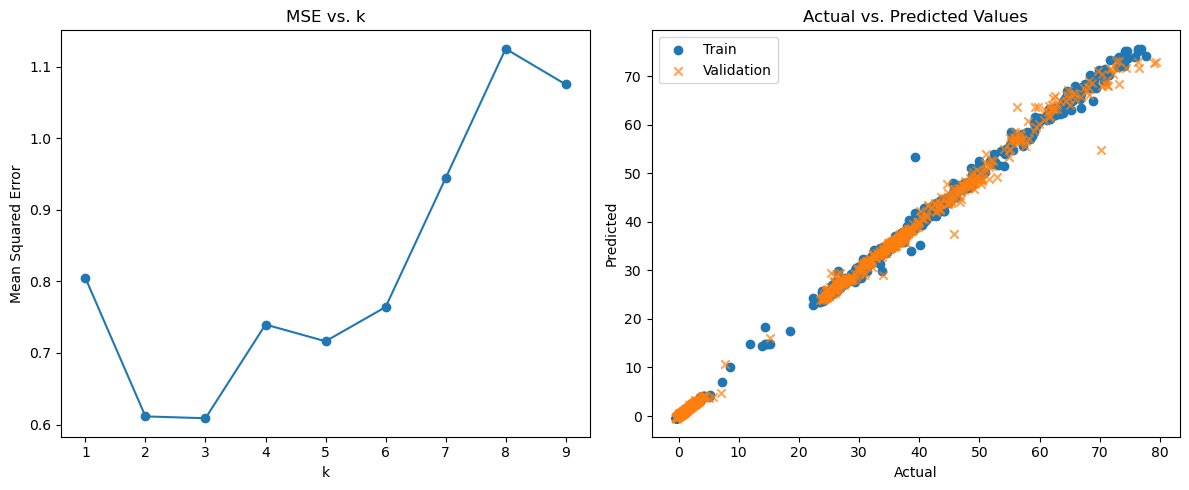

In [103]:
import matplotlib.pyplot as plt

# Data for plotting MSE

k_values = resultsbnb['k']
mse_values = resultsbnb['MSE']

# Plotting the MSE values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, mse_values, marker='o')
plt.xlabel('k')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs. k')

# Scatter plot for actual vs. predicted values

plt.subplot(1, 2, 2)
plt.scatter(train_y, train_predictions, label='Train')
plt.scatter(valid_y, valid_y_pred, label='Validation', alpha=0.7, marker='x')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.title('Actual vs. Predicted Values')

plt.tight_layout()
plt.show()

In [104]:
# Print different k_values and MSE
resultsbnb

,k,MSE
0,1,0.804816
1,2,0.611333
2,3,0.608759
3,4,0.739773
4,5,0.716368
5,6,0.764182
6,7,0.944418
7,8,1.125249
8,9,1.075510


# KNN Classification for NVDA

In [105]:
# Get the dataset for NVDA

df_nvda

,Close,High,Low,Open,Volume
Date,,,,,
2018-01-02,49.84,49.88,48.62,48.94,35561600
2018-01-03,53.12,53.42,50.94,51.03,91470400
2018-01-04,53.40,54.51,53.17,53.94,58326800
2018-01-05,53.85,54.23,52.77,53.55,58012400
2018-01-08,55.50,56.25,54.65,55.10,88121600
...,...,...,...,...,...
2024-04-16,874.15,881.18,860.64,864.33,37045300
2024-04-17,840.35,887.75,839.50,883.40,49540000
2024-04-18,846.71,861.90,824.02,849.70,44726000


In [106]:
# Add new column of Open_Close price difference
# Add column of High and low price difference
# Classification based on high or low and price

df_nvda['Open_Close'] = df_nvda['Open']- df_nvda['Close']
df_nvda['High_Low'] = df_nvda['High']-df_nvda['Low']

In [107]:
df_nvda

,Close,High,Low,Open,Volume,Open_Close,High_Low
Date,,,,,,,
2018-01-02,49.84,49.88,48.62,48.94,35561600,-0.90,1.26
2018-01-03,53.12,53.42,50.94,51.03,91470400,-2.09,2.48
2018-01-04,53.40,54.51,53.17,53.94,58326800,0.54,1.34
2018-01-05,53.85,54.23,52.77,53.55,58012400,-0.30,1.46
2018-01-08,55.50,56.25,54.65,55.10,88121600,-0.40,1.60
...,...,...,...,...,...,...,...
2024-04-16,874.15,881.18,860.64,864.33,37045300,-9.82,20.54
2024-04-17,840.35,887.75,839.50,883.40,49540000,43.05,48.25
2024-04-18,846.71,861.90,824.02,849.70,44726000,2.99,37.88


In [108]:
# Remove any nulls or nan

df_nvda = df_nvda.dropna()

In [109]:
# The predictors for the classification task

X = df_nvda[['Open_Close','High_Low']]

In [110]:
# To get the first five rows
X.head()

,Open_Close,High_Low
Date,,
2018-01-02,-0.90,1.26
2018-01-03,-2.09,2.48
2018-01-04,0.54,1.34
2018-01-05,-0.30,1.46
2018-01-08,-0.40,1.60


In [111]:
# To predict whether a customer should buy or sell NVDA stock

# Classification task whether to buy or sell the stock
# where Buy is +1
# Sell is -1

# Outcome y

y = np.where(df_nvda['Close'].shift(-1) > df_nvda['Close'],1,-1)
y

array([ 1,  1,  1, ..., -1,  1, -1])

In [112]:
# Import the libraries 

from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


In [113]:
# Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [114]:
# Use gridsearch to get the best
# Fit the classifier model

params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12]}
knn = neighbors.KNeighborsClassifier()
model = GridSearchCV(knn,params,cv=6)

In [115]:
# Fit the model
model.fit(X_train,y_train)

GridSearchCV(cv=6, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]})

In [116]:
# Prediction

pred = model.predict(X_test)

pred

array([-1,  1,  1, -1, -1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1, -1,  1,
        1,  1, -1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1, -1, -1, -1,  1, -1, -1,  1, -1, -1,  1,  1,
        1,  1,  1, -1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1, -1,  1,
       -1, -1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1, -1, -1,
        1,  1,  1, -1, -1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1, -1, -1,
       -1, -1,  1,  1,  1,  1, -1, -1,  1, -1,  1, -1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1,  1, -1,
        1, -1,  1,  1, -1,  1,  1,  1,  1, -1, -1,  1, -1,  1,  1,  1,  1,
        1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,
       -1,  1, -1,  1,  1, -1,  1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1, -1, -1,  1, -1,  1, -1, -1,  1,  1, -1,  1,
        1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1, -1,  1, -1, -1, -1,  1,
        1, -1,  1,  1,  1

In [117]:
# Check the accuracy of the classification on both train and test set

trainAccuracy = accuracy_score(y_train,model.predict(X_train))
testAccuracy = accuracy_score(y_test,model.predict(X_test))

print('Accuracy of Train Data: %.2f' % trainAccuracy)
print('Accuracy of Test Data: %.2f' % testAccuracy)

Accuracy of Train Data: 0.67
Accuracy of Test Data: 0.52


In [118]:
# Compare the actual values and the predicted values

predicted_actual_data  = pd.DataFrame({'Actual_values':y_test,'Predicted_values':pred})
predicted_actual_data

,Actual_values,Predicted_values
0,1,-1
1,-1,1
2,-1,1
3,1,-1
4,1,-1
...,...,...
471,1,-1
472,1,-1
473,-1,1
474,1,1


## Neural Networks (LSTM) for Returns Forecast of NVDA and BNB-USD

### We have used LSTM to forecast as it would compliement our study to analyse the returns of crypto and tech stocks , and can give a rough idea of how the stock or crypto performances in the future to potential investors

## please install the libraries tensorflow, keras to run the code

### In the below cell you can remove the # and run the code block if you don't have tensorflow and keras installed. The below code block willl install tensorflow and keras with version 2.12

#### Usually keras is installed as part of tensorflow, but just incase we have provided the code to install keras as well. 

In [119]:
pip install  tensorflow 


Note: you may need to restart the kernel to use updated packages.


In [120]:
pip install keras

In [121]:
# Get the libraries for timeseries RNN LSTM neural networks

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler

In [122]:
# Set random seed

import tensorflow as tf

np.random.seed(42)
tf.random.set_seed(42)

# We advise you to plug in your laptop while you are running the code else, it might take longer than expected.

# Please note that the forecasting code below will take about 9-17 minutes on average to run depending on your laptop


#### the code executed seamlessly we tested multiple times by restarting the kernel and on different laptops , if you are unable to run the code please reach out. 

In [123]:
# Create a function for the future returns forecasting

def forforecating (df,n) : 
    # Drop all columns except for 'BNB-USD'
    np.random.seed(42)
    tf.random.set_seed(42)
    df = df
    # this is the input length used for predicting the next data point
    length60 = 60
    len(df)
    test_percent = 0.2
    test_length = np.round(len(df)*test_percent)
    test_length
    split_index = int(len(df) - test_length)
    split_index
    data_train = df.iloc[: split_index]
    data_test = df.iloc[split_index - length60 :]
    scaler = MinMaxScaler()
    scaler.fit(data_train)
    normalized_train = scaler.transform(data_train)
    normalized_test = scaler.transform(data_test)
    batch_size32 = 32
    train_tsGenerator60 = TimeseriesGenerator(normalized_train, normalized_train, length=length60, batch_size=batch_size32)
    len(normalized_train)
    len(train_tsGenerator60)
    
    # Building the model
    n_features = 1
    # creating the lstm model with two drop out layers, two lstm layers with relu activation and to generate the ouput we use the fully connected layer
    model = Sequential()
    model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(length60, n_features)))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, activation='relu', return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    model.summary()
    model.fit(train_tsGenerator60, epochs=100)
    loss_history_keys = model.history.history.keys()
    loss_history_keys
    df_model_loss = pd.DataFrame(model.history.history)
    df_model_loss.plot()
    
    
    # FOR TESTING 
    batch_size1 = 1
    test_tsGenerator60 = TimeseriesGenerator(normalized_test, normalized_test, length=length60, batch_size=batch_size1)
    normalized_prediction = model.predict(test_tsGenerator60)
    
    # length of normalized predicttions on test dataset 
    print(len(normalized_prediction))
    prediction = scaler.inverse_transform(normalized_prediction)
    prediction_index = np.arange(split_index,len(df), step=1)
    df_prediction = pd.DataFrame(data=prediction, index=prediction_index, columns=['Prediction'])
    ax = data_train.plot()
    df_prediction.plot(ax=ax, figsize=(12, 12))
    
    # plots a graph for actual vs predicted.
    ax = df.plot()
    df_prediction.plot(ax=ax, figsize=(12, 12))
    df=df
    full_scaler = MinMaxScaler()
    normalized_full_data = full_scaler.fit_transform(df)

    
    # creating timeseries Generator for forecasting
    length60=60
    batch_size32=32
    forecast_tsGenerator = TimeseriesGenerator(normalized_full_data, normalized_full_data, length=length60, batch_size=batch_size32)
    model.fit(forecast_tsGenerator, epochs = 100)
    forecast = []
    periods = n
    first_eval_batch = normalized_full_data[-length60:]
    current_batch = first_eval_batch.reshape((1, length60, n_features))
    for i in range(periods):
        current_pred = model.predict(current_batch)[0]
        forecast.append(current_pred)
        current_batch = np.append(current_batch[:,1:,:], [[current_pred]],axis=1)
    forecast = full_scaler.inverse_transform(forecast)
    forecast_index = np.arange(len(df),len(df)+periods,step=1)
    forecast_df=pd.DataFrame(data=forecast,index=forecast_index,columns=['Forecast'])
    forecast_df
    df.plot()
    forecast_df.plot()
    ax=df.plot()
    forecast_df.plot(ax=ax, figsize=(12,8))

In [124]:
# Drop all columns except for 'BNB-USD'

df = cumCryptoReturns[['BNB-USD']].values
df=pd.DataFrame(df)
# Rename the column from '0' to 'BNB-USD'
df.columns = ['BNB-USD']
df

,BNB-USD
0,0.051130
1,0.134364
2,0.095125
3,0.774078
4,1.706302
...,...
2298,64.656361
2299,64.979786
2300,66.890606
2301,67.920333


In [125]:
# Please input the number of days of forecast you want below
# in out report we used 100 days of forecast
# oonce you enter the  number of days you need to manually select the next code block and run it. 

x = int(input("Enter the no of days of future forecast required :"))
x

Enter the no of days of future forecast required :100


100

In [126]:
# Drop all columns except for 'BTC-USD'

df = cumCryptoReturns[['BTC-USD']].values
df=pd.DataFrame(df)
# Rename the column from '0' to 'BNB-USD'
df.columns = ['BTC-USD']
df

,BTC-USD
0,0.097011
1,0.113039
2,0.142196
3,0.276213
4,0.283352
...,...
2298,3.650496
2299,3.674719
2300,3.758987
2301,3.754023


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 60, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.0930
Epoch 2/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0169
Epoch 3/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0041
Epoch 4/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0045
Epoch 5/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0042
Epoch 6/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0041
Epoch 7/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0025
Epoch 8/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0023
Epoch 9/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0036
Epoch 10/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0043
Epoch 11/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0056
Epoch 12/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0047
Epoch 13/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0060
Epoch 14/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0028
Epoch 15/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - lo

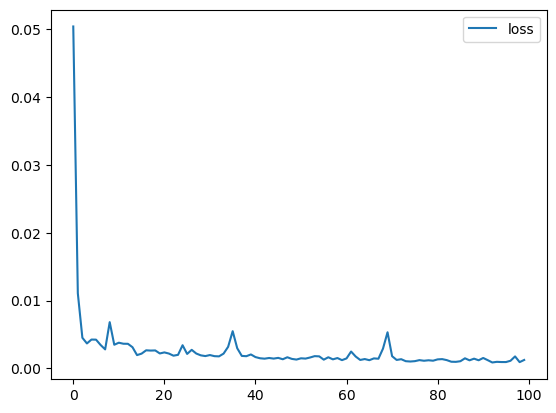

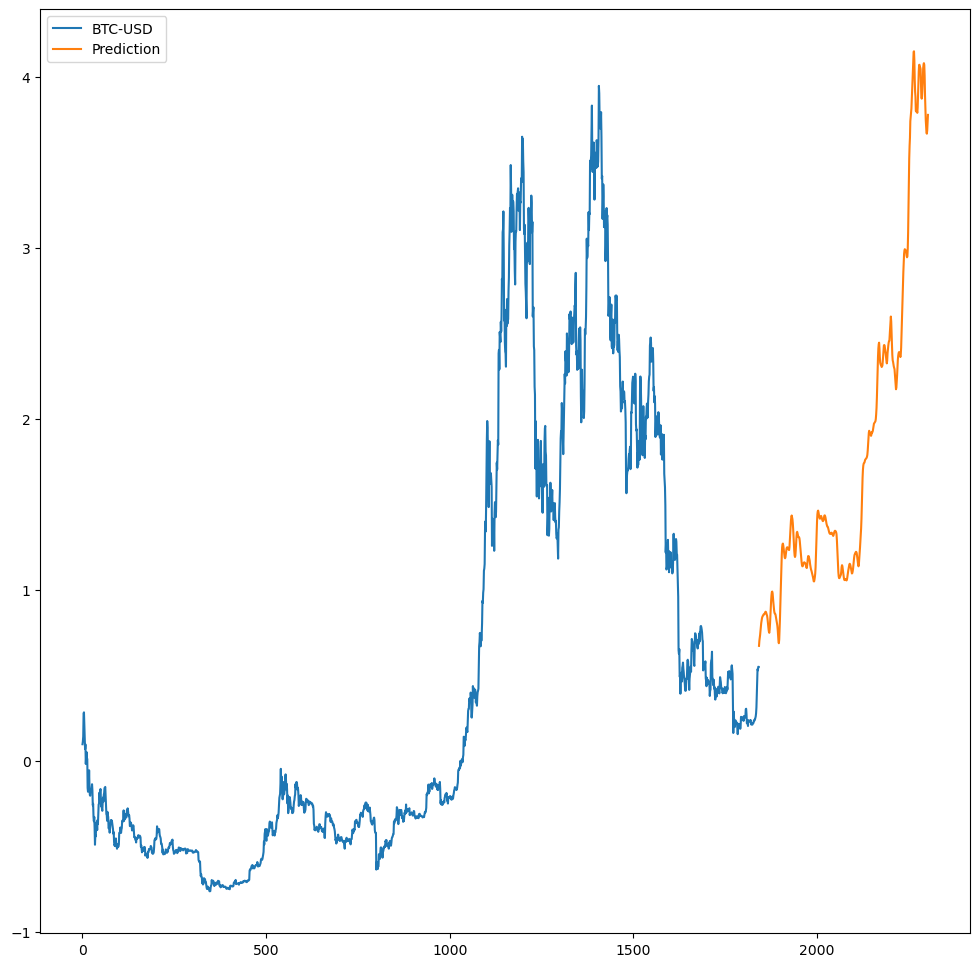

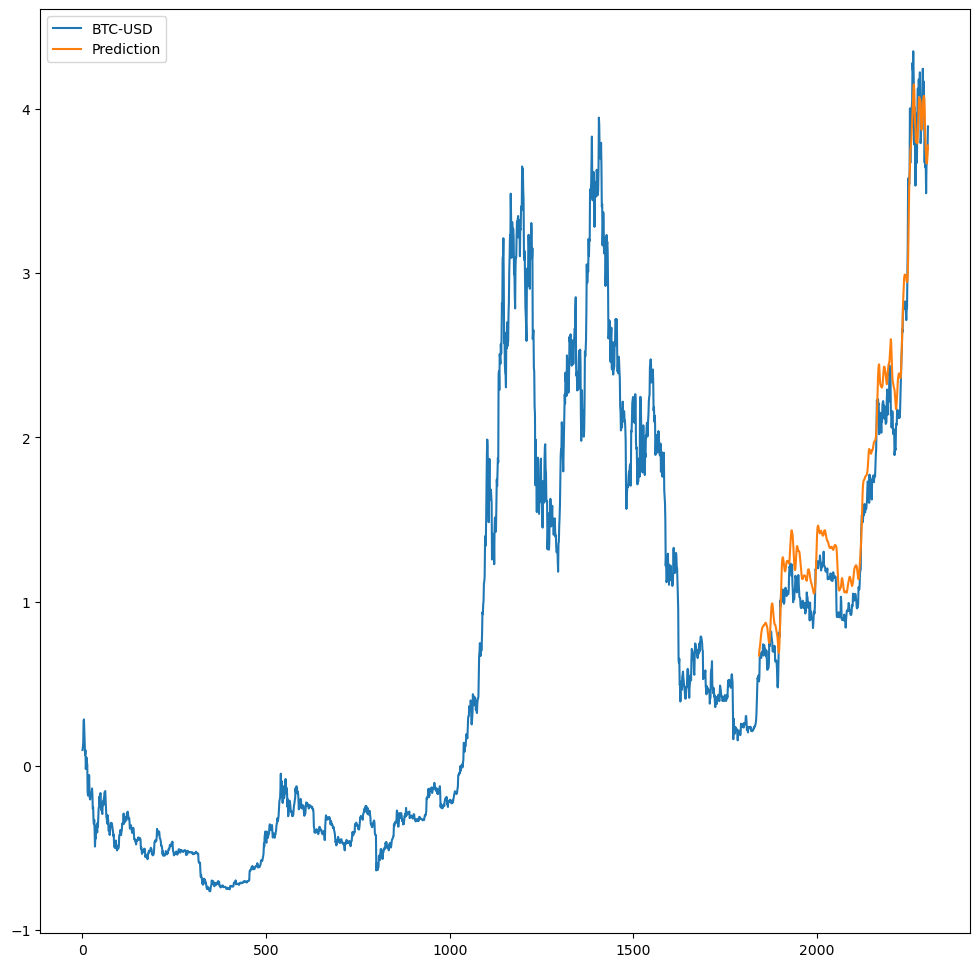

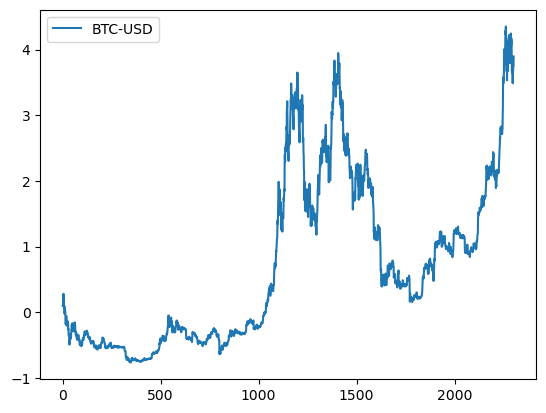

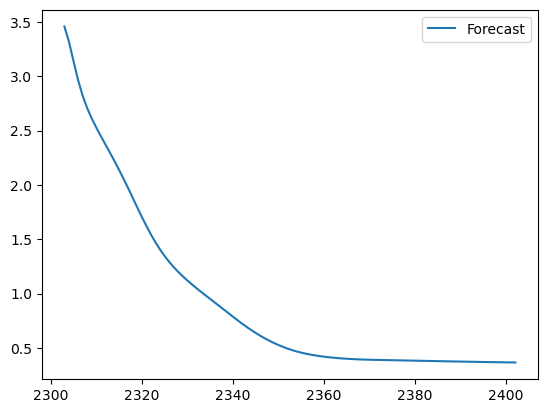

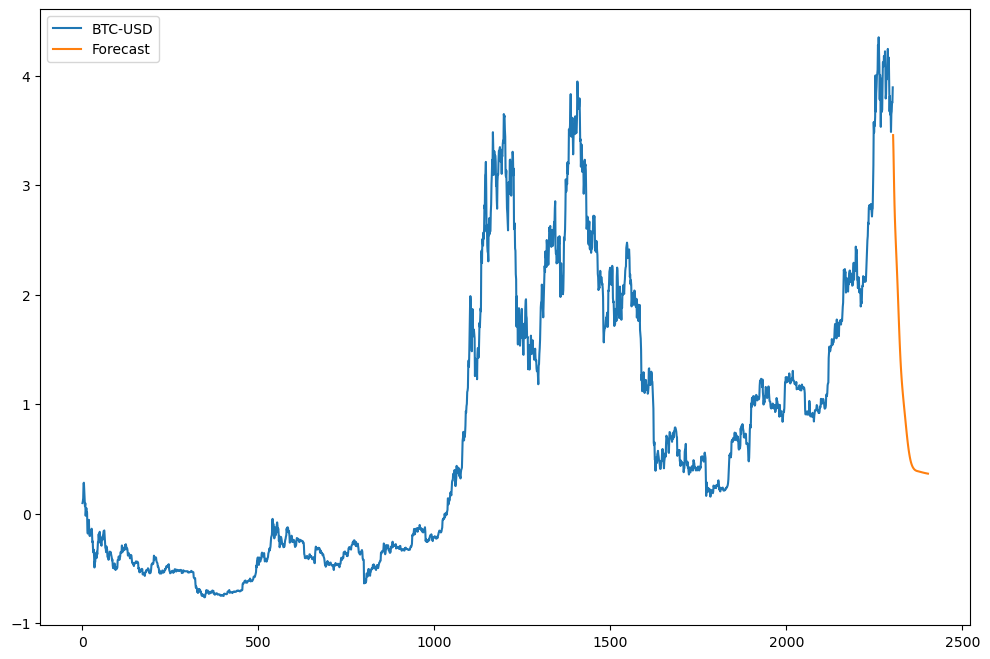

In [127]:
forforecating(df,x)

In [128]:
# Drop all columns except for 'BNB-USD'

df = cumCryptoReturns[['BNB-USD']].values
df=pd.DataFrame(df)
# Rename the column from '0' to 'BNB-USD'
df.columns = ['BNB-USD']
df

,BNB-USD
0,0.051130
1,0.134364
2,0.095125
3,0.774078
4,1.706302
...,...
2298,64.656361
2299,64.979786
2300,66.890606
2301,67.920333


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 60, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.0725
Epoch 2/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0131
Epoch 3/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0041
Epoch 4/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0035
Epoch 5/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0057
Epoch 6/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0075
Epoch 7/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0071
Epoch 8/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0027
Epoch 9/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0037
Epoch 10/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0031
Epoch 11/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0138
Epoch 12/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0043
Epoch 13/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0050
Epoch 14/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0044
Epoch 15/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - lo

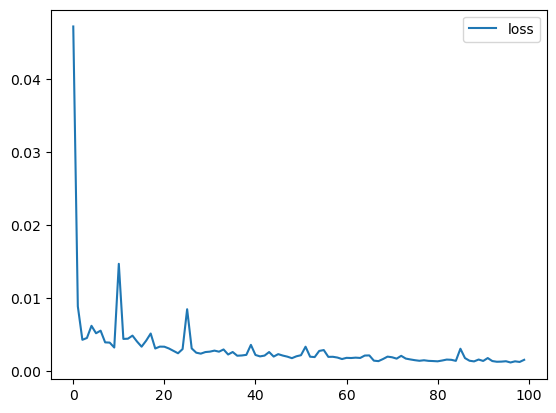

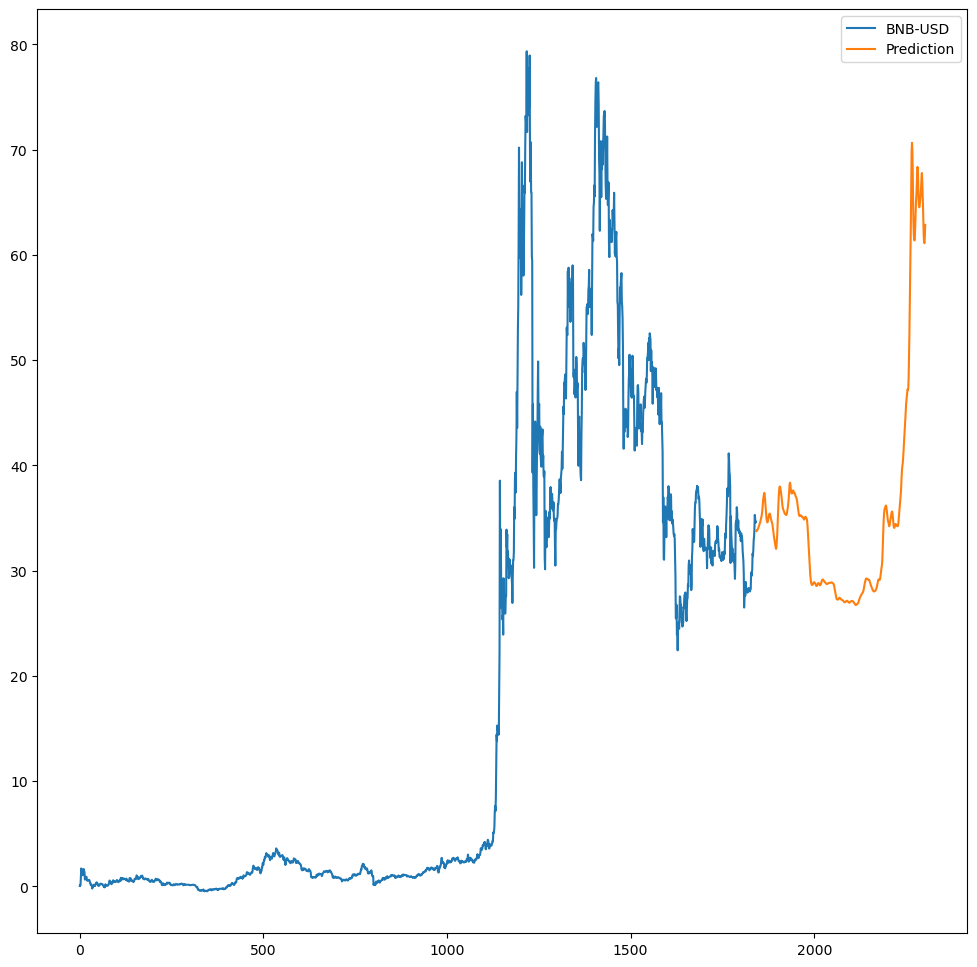

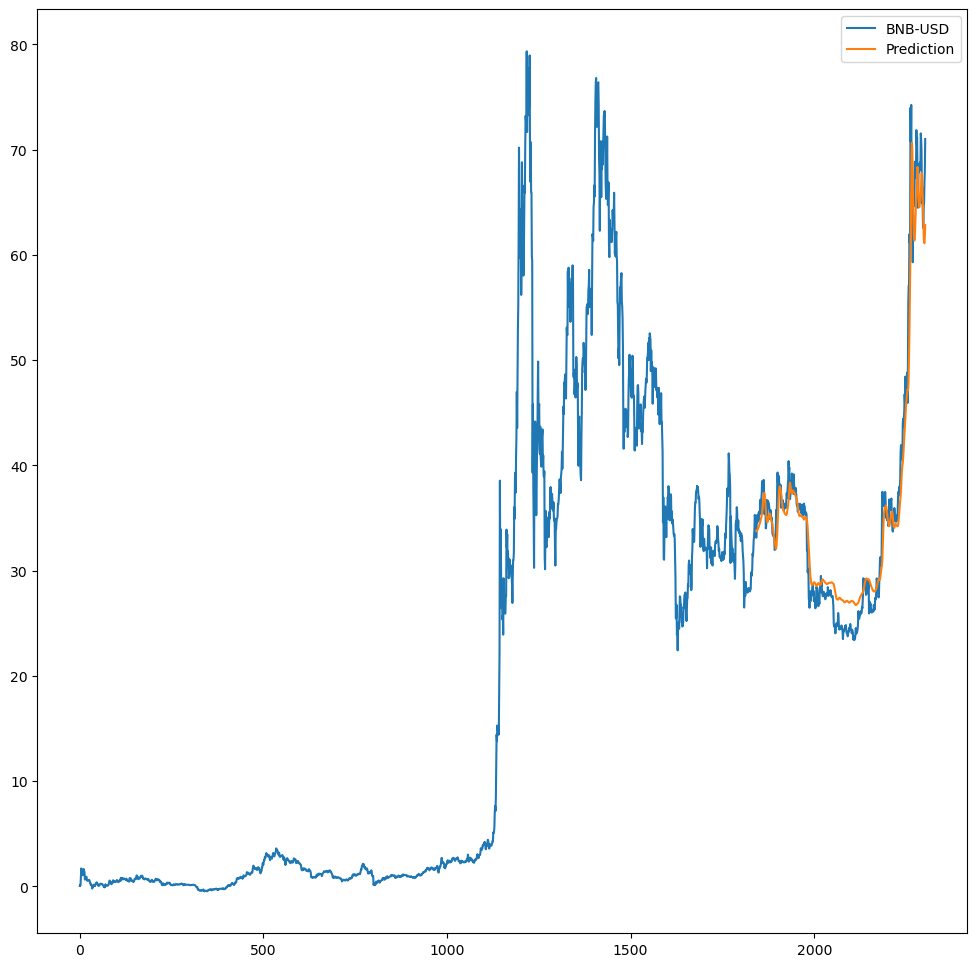

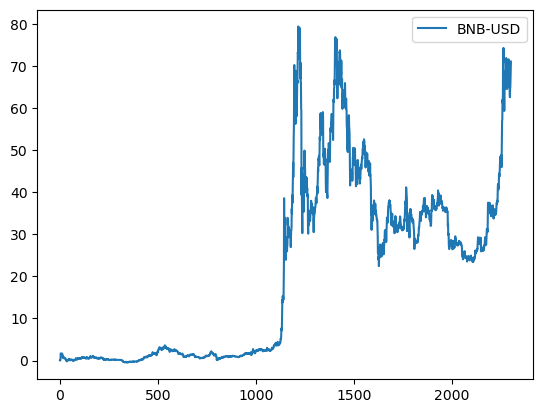

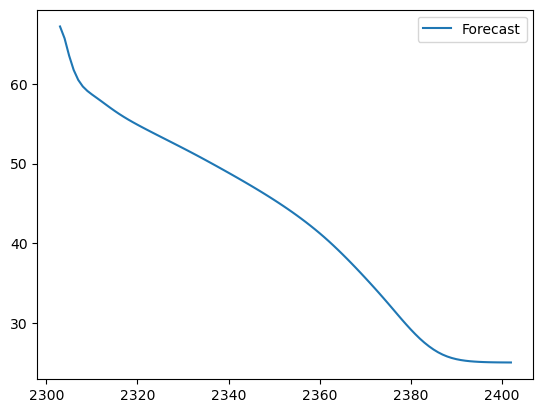

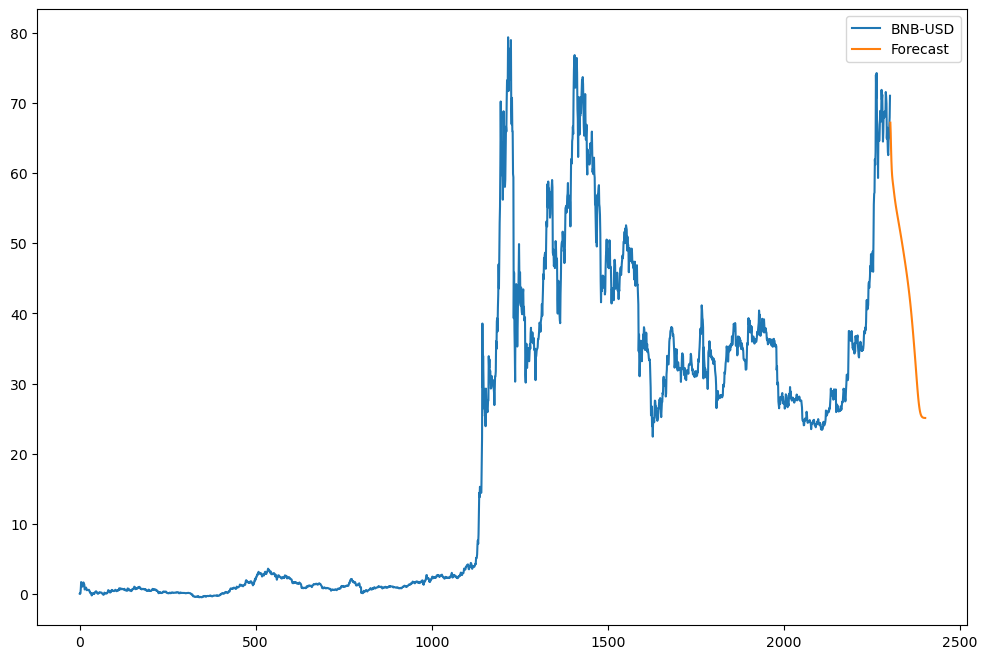

In [129]:
# For 100 days returns forecasting of BNB Crypto
# you can extend the output view by dragging the bottom right corner and scroll through the output window to view the output
# the code will first complete the train and test epochs resulting in 200 epocs in total.
# once the 200 epochs are completed you will get the forecast and performance of the model on training and testing data
# you also find  a slight change evrytime you rerun the code it based on the learning rate of the model.

forforecating(df,x)

In [130]:
# preparing the data for nvda forecast

# Drop all columns except for 'NVDA'

df2= stockReturns_cum[['NVDA']].values
df2=pd.DataFrame(df2)
# Rename the column from '0' to 'NVDA'
df2.columns = ['NVDA']
df2

,NVDA
0,0.065910
1,0.071385
2,0.080511
3,0.113567
4,0.113364
...,...
1580,16.727641
1581,16.042182
1582,16.171162
1583,14.453255


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 60, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_8 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.1076
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0294
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0111
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0040
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0033
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0104
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0050
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0056
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0062
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0021
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0050
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0043
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0048
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0019
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - lo

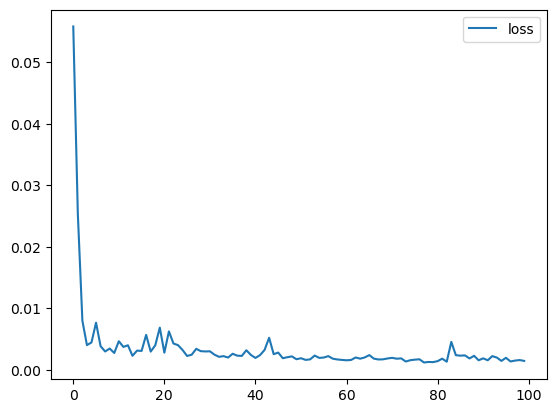

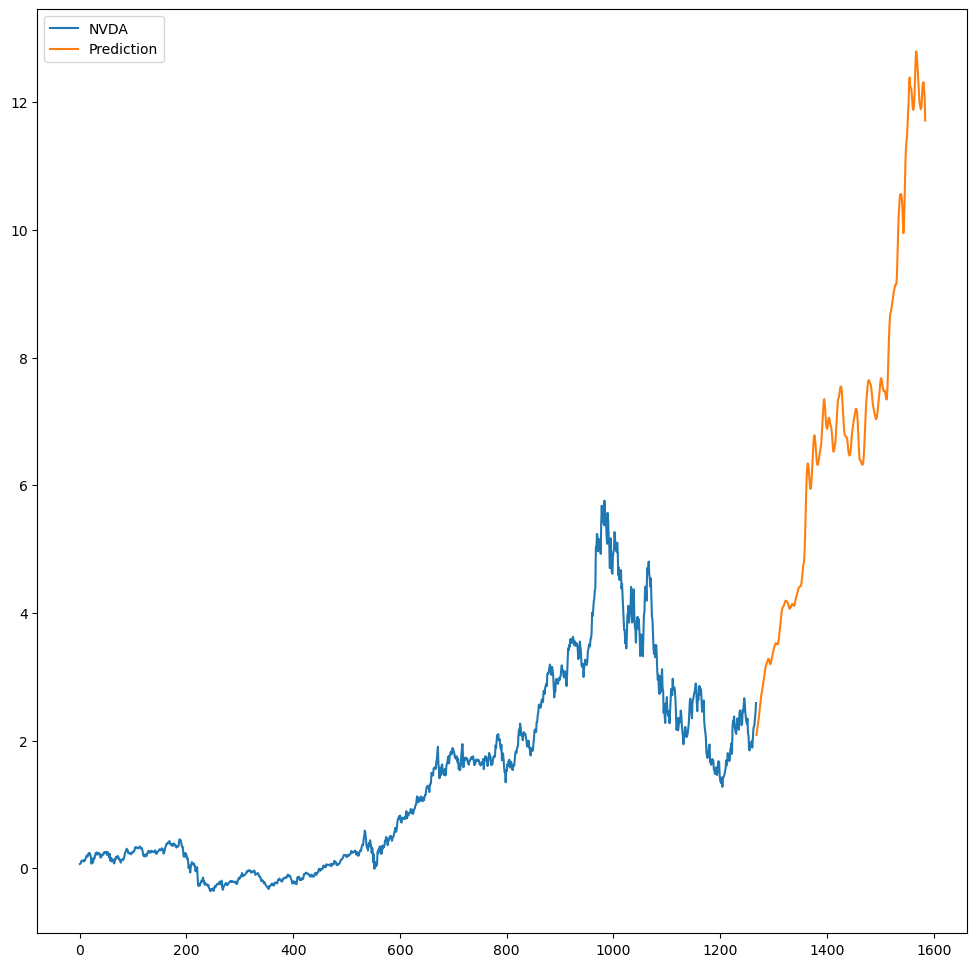

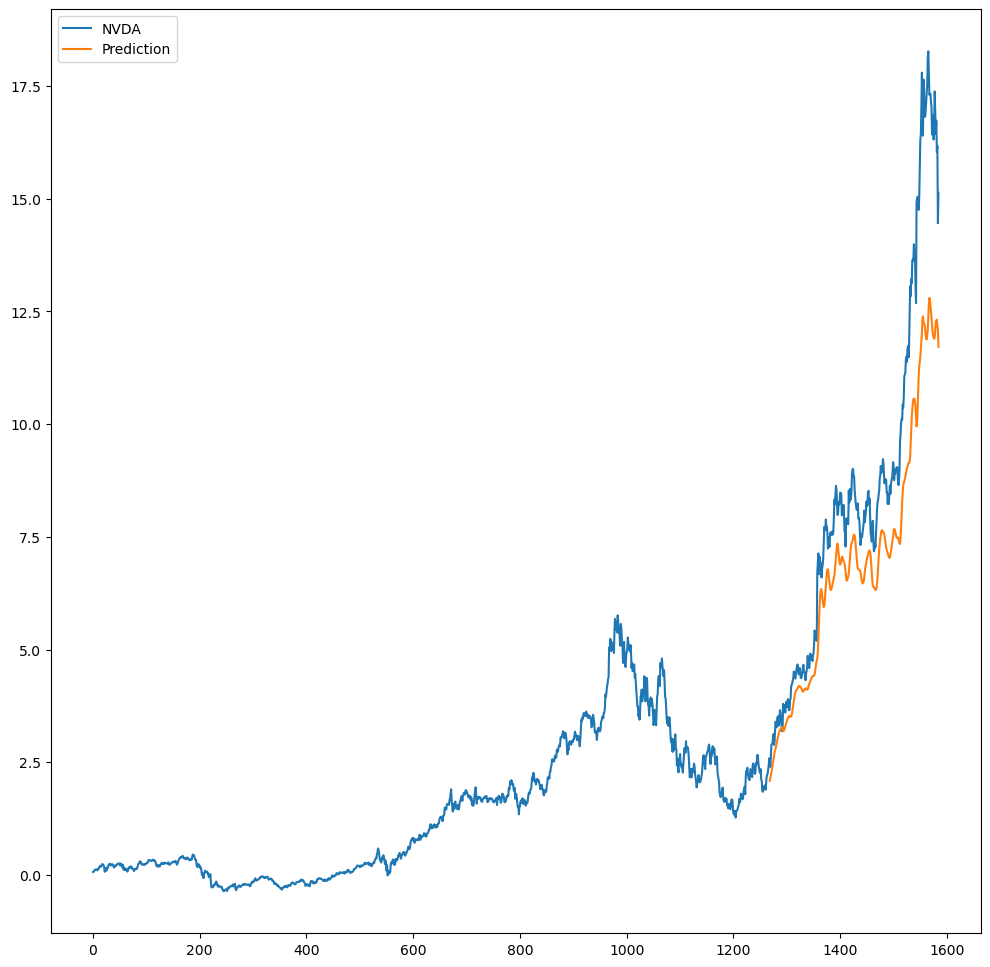

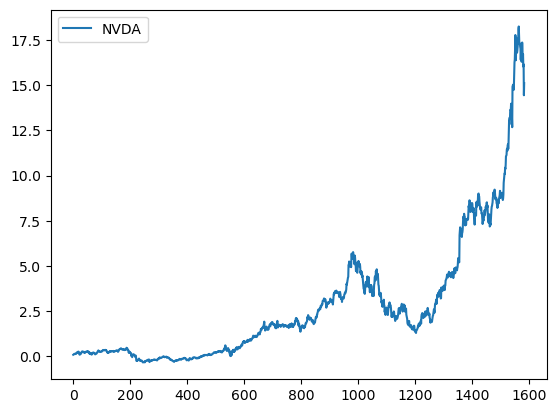

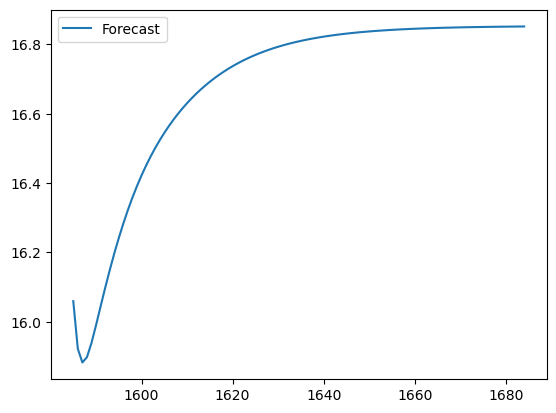

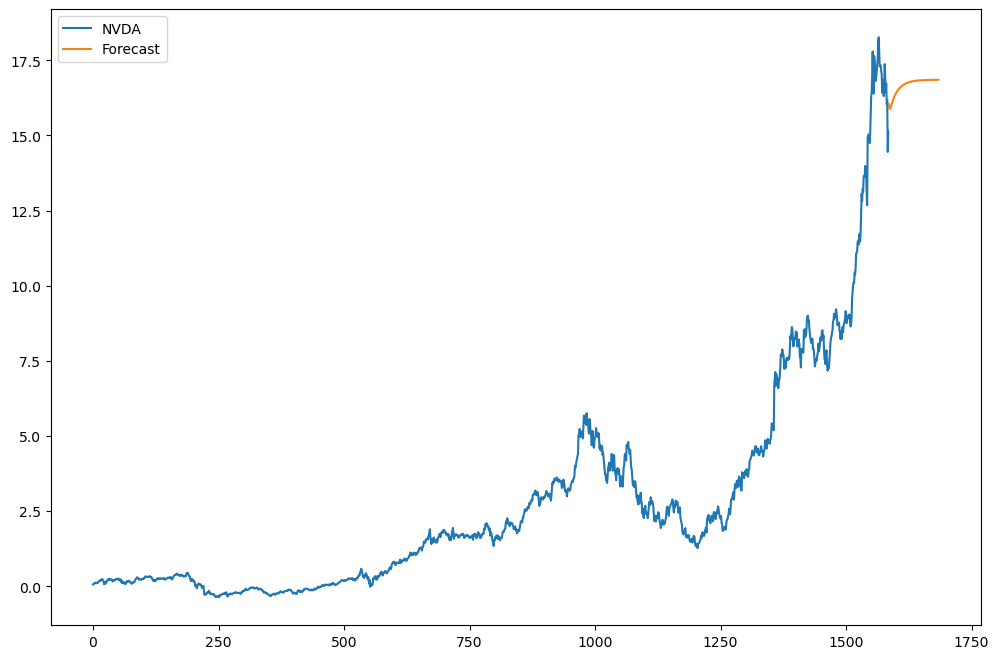

In [131]:
# 100 Days of forecast for NVDA
# you can extend the output view by dragging the bottom right corner and scroll through the output window to view the output
# the code will first complete the train and test epochs resulting in 200 epocs in total.
# once the 200 epochs are completed you will get the forecast and performance of the model on training and testing data
# you also find  a slight change evrytime you rerun the code it is based on the learning rate of the model.


forforecating(df2,x)

In [132]:
# preparing the data for nvda forecast

# Drop all columns except for 'GOOG'

df2= stockReturns_cum[['GOOG']].values
df2=pd.DataFrame(df2)
# Rename the column from '0' to 'NVDA'
df2.columns = ['GOOG']
df2

,GOOG
0,0.016338
1,0.020094
2,0.034930
3,0.039437
4,0.038685
...,...
1580,1.929577
1581,1.946103
1582,1.956995
1583,1.924319


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_9 (LSTM)                        │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_10 (LSTM)                       │ (None, 60, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.1669
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0100
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0060
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0089
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0042
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0046
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0036
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0047
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0023
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0052
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0038
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0021
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0040
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0047
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - lo

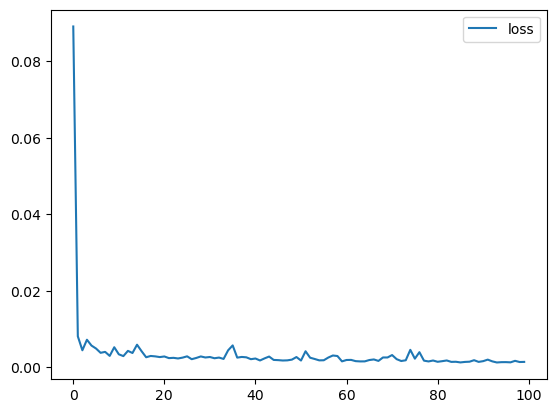

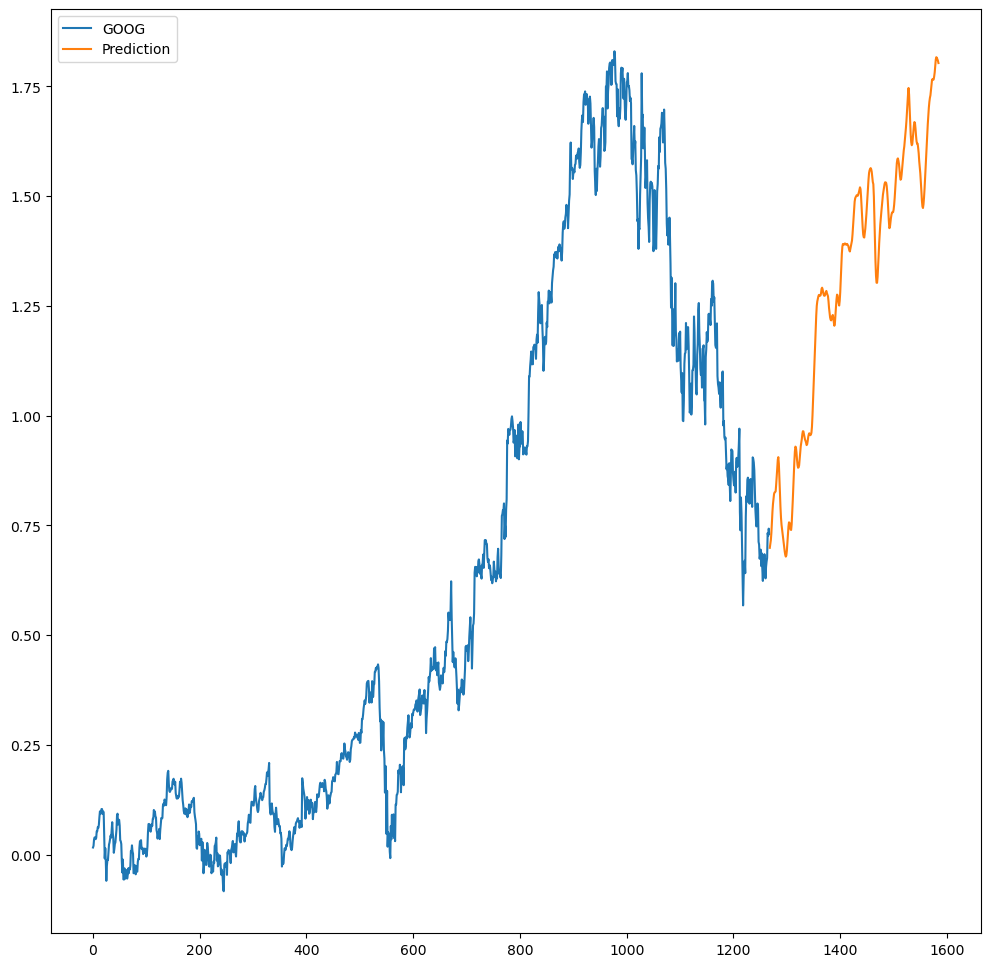

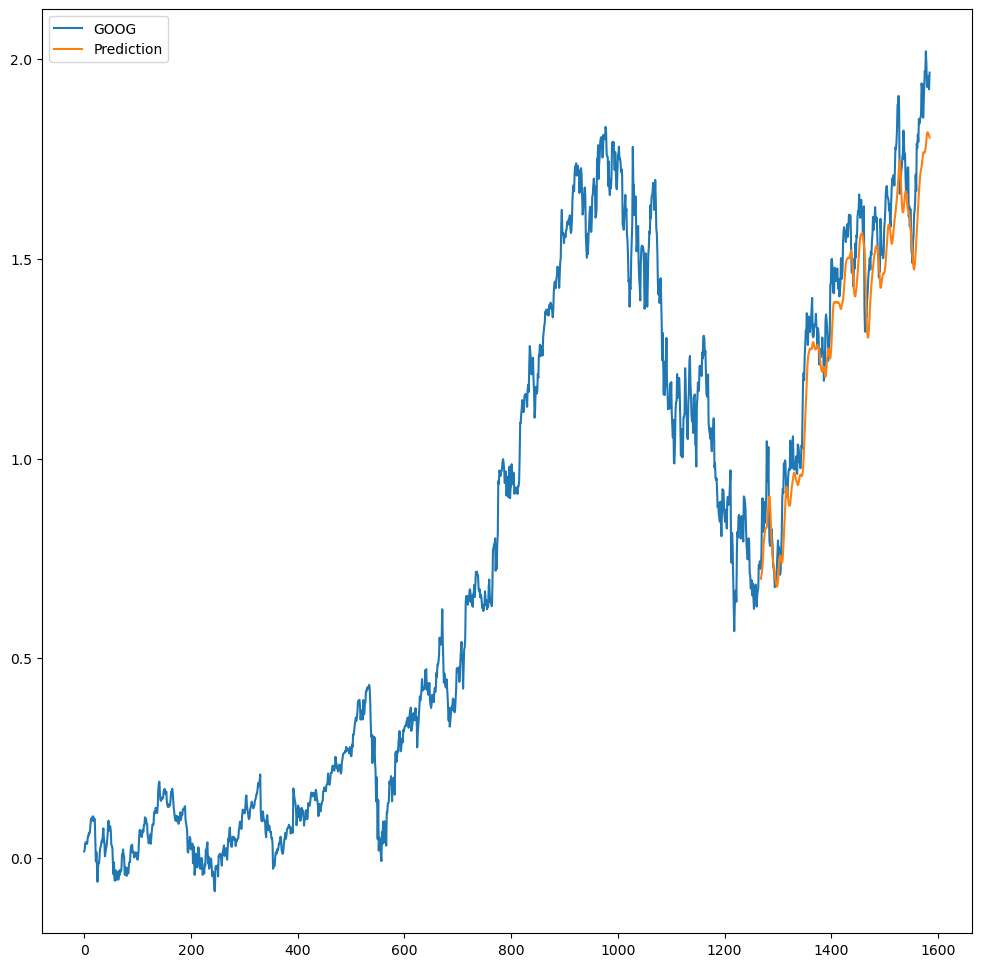

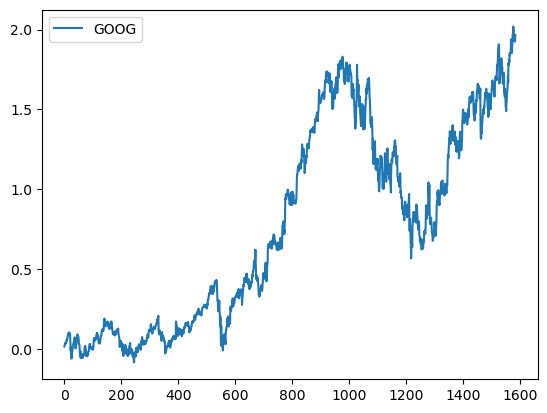

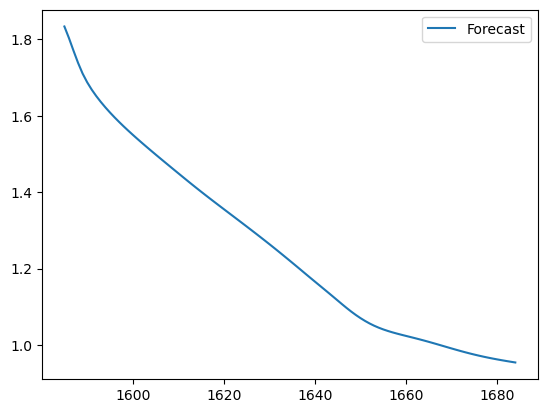

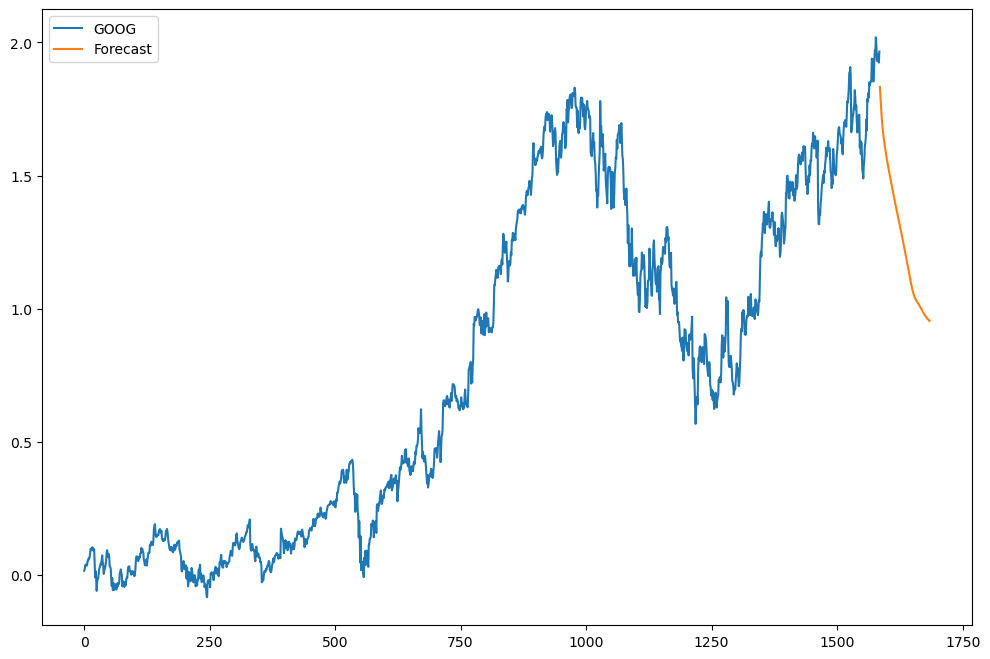

In [133]:
# 100 Days of forecast for GOOG
# you can extend the output view by dragging the bottom right corner and scroll through the output window to view the output
# the code will first complete the train and test epochs resulting in 200 epocs in total.
# once the 200 epochs are completed you will get the forecast and performance of the model on training and testing data
# you also find  a slight change evrytime you rerun the code it is based on the learning rate of the model.


forforecating(df2,x)